In [1]:
!python -V

Python 3.10.0


## Импортируем нужные библиотеки и считываем данные

In [2]:
import warnings
import matplotlib
import squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.ticker import FormatStrFormatter

matplotlib.rcParams.update({'font.size': 28})
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
# % matplotlib inline

In [3]:
data_scoring = pd.read_csv("data/credit.csv")
data_scoring.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6,1,228190,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35,0,229976,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18,1,297996,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9,0,256329,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15,0,253460,427174.00,0.00,0.00


### Описание полей
* Loan ID: уникальный идентификатор кредита;
* Customer ID: уникальный идентификатор клиента;
* Loan Status: категориальный признак - кредит погашен ("Fully Paid") или не погашен ("Charged Off");
* Current Loan Amount: размер кредита;
* Term: срок кредита;
* Credit Score: кредитный рейтинг - число от 0 до 800;
* Years in current job: стаж на текущем месте работы;
* Home Ownership: статус недвижимости - собственность ("Own"), ипотека ("Home Mortgage") или аренда ("Rent");
* Annual Income: годовой доход;
* Purpose: цель кредита;
* Monthly Debt: размер ежемесячного платежа по текущим кредитам;
* Years of Credit History: количество лет кредитной истории;
* Months since last delinquent: количество месяцев с последнего нарушения условий кредита;
* Number of Open Accounts: количество открытых кредитных карт;
* Number of Credit Problems: количество кредитных проблем;
* Current Credit Balance: суммарный текущий долг;
* Maximum Open Credit: максимальный кредитный лимит из всех источников;
* Bankruptcies: количество банкротств;
* Tax Liens: количество нарушений налогового законодательства.

## Смотрим предварительную информацию о данном датасете

In [4]:
data_scoring.shape

(100000, 19)

In [5]:
data_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

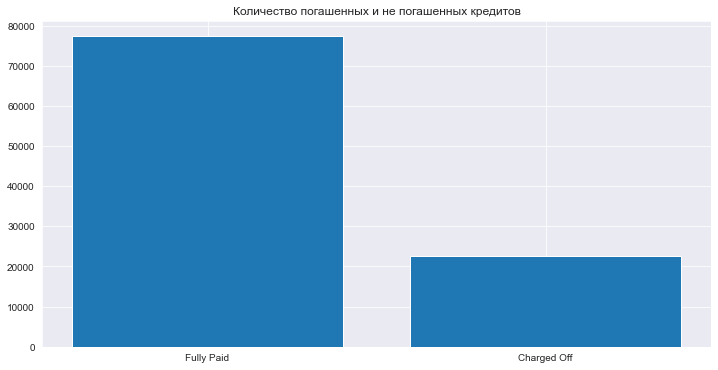

In [6]:
cols = data_scoring["Loan Status"].unique()
counts = data_scoring["Loan Status"].value_counts()

fig, ax = plt.subplots()
ax.bar(cols, counts)
plt.title("Количество погашенных и не погашенных кредитов")
fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

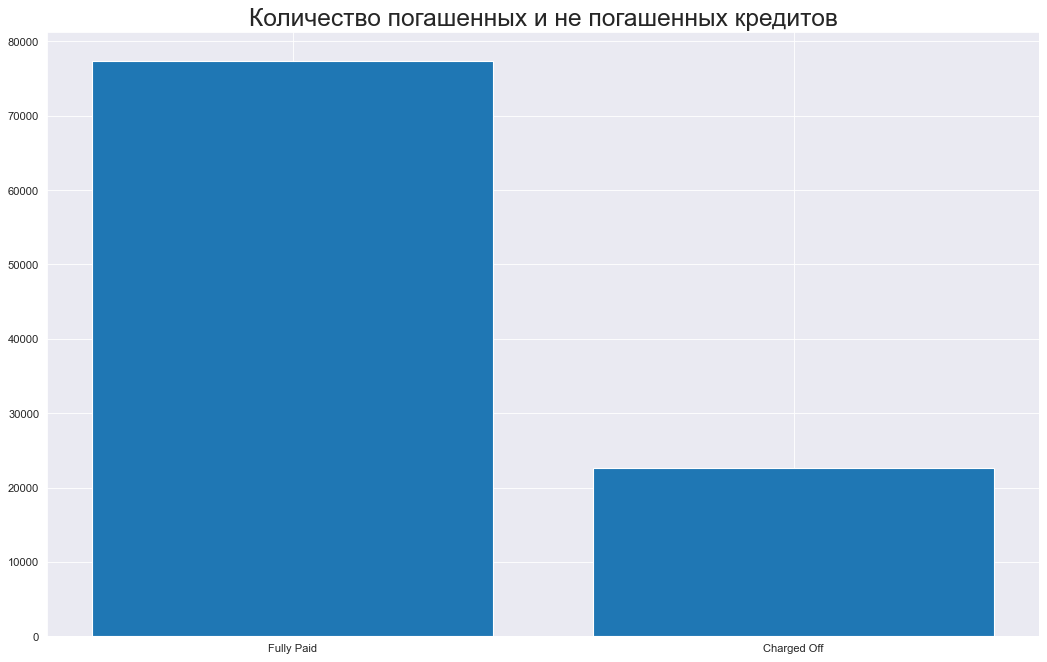

In [7]:
cols = data_scoring["Loan Status"].unique()
counts = data_scoring["Loan Status"].value_counts()

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(cols, counts)

plt.title("Количество погашенных и не погашенных кредитов", fontsize=22)
plt.show()

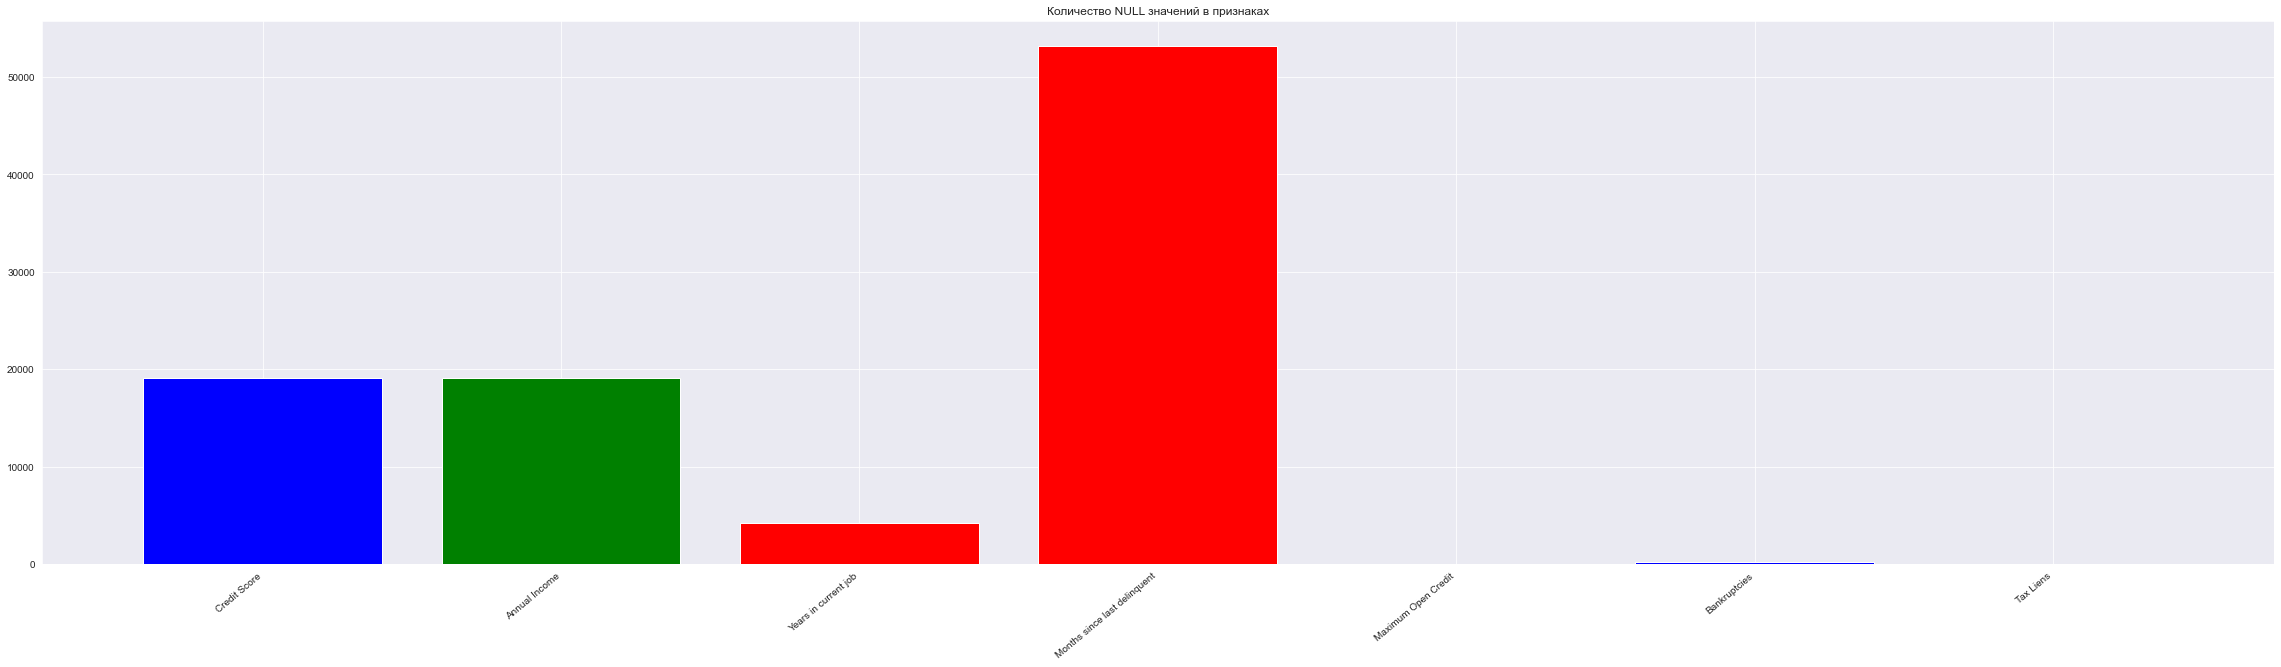

In [8]:
columns_with_null = data_scoring.isna().sum() > 0
columns_with_null = columns_with_null.index[columns_with_null].to_list()

plt.figure(figsize=(40, 10))

groups = columns_with_null
len_of_nulls = data_scoring[columns_with_null].isna().sum()
colors = [["r", "b", "g"][int(np.random.randint(0, 3, 1))] for _ in len_of_nulls]

plt.gca().set_xticklabels(columns_with_null, rotation=40, horizontalalignment= 'right')
plt.bar(groups, len_of_nulls, color=colors)
plt.title("Количество NULL значений в признаках")
plt.show()

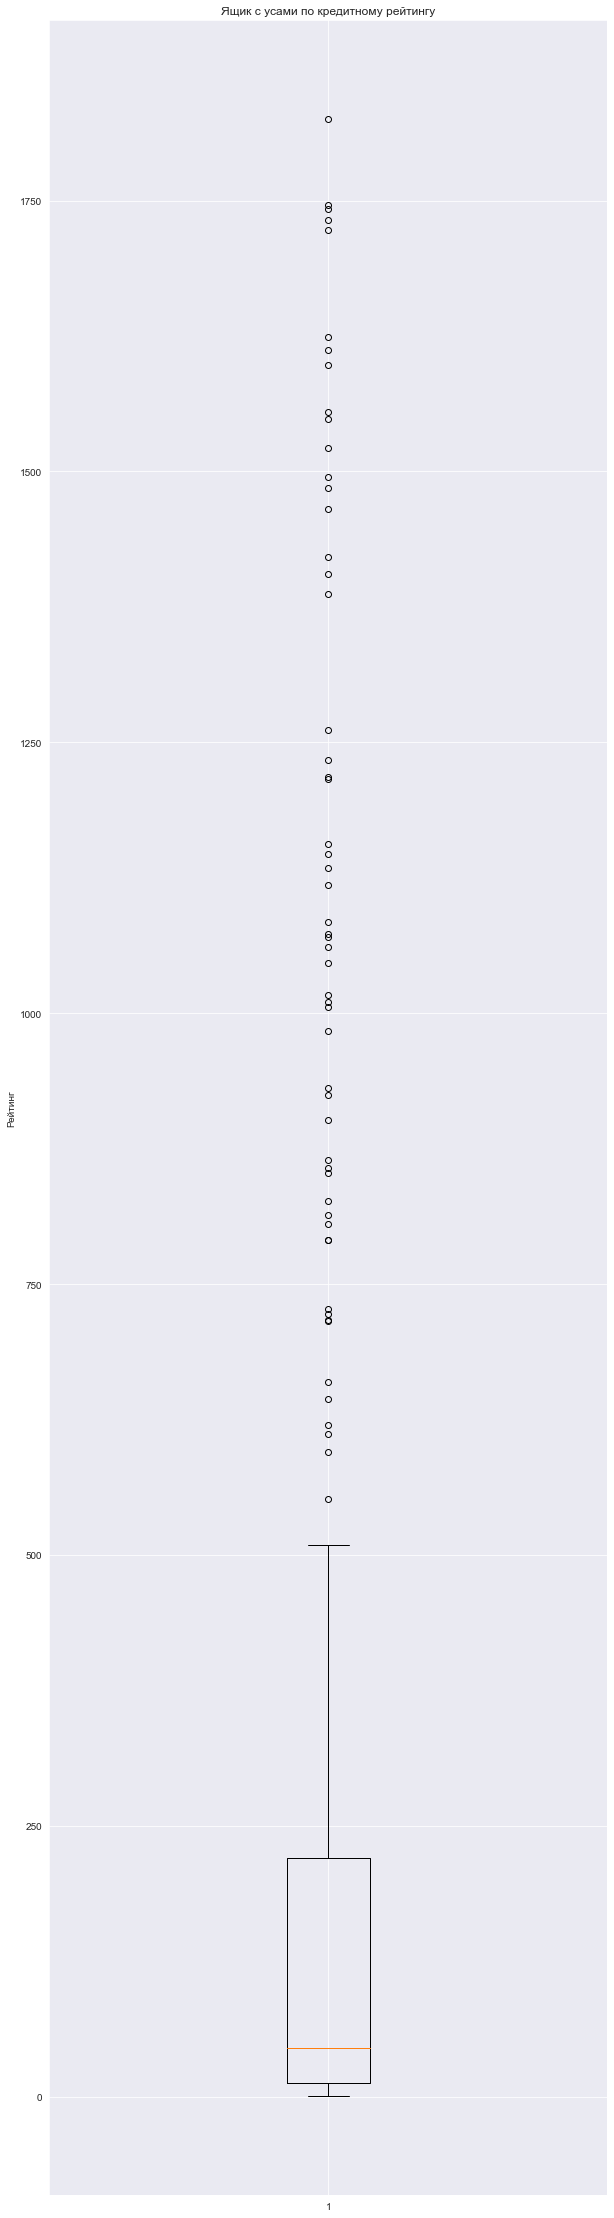

In [9]:
credit_score = data_scoring["Credit Score"].value_counts()

plt.figure(figsize=(10, 40))

plt.boxplot(credit_score)
plt.title('Ящик с усами по кредитному рейтингу')
plt.ylabel('Рейтинг')
plt.show()

In [10]:
years_term = data_scoring[["Term", "Years in current job"]]\
    .groupby(by=["Years in current job"]).value_counts().unstack(["Term"])
years_term

Term,Long Term,Short Term
Years in current job,,
1 year,1571,4889
10+ years,10069,21052
2 years,2304,6830
3 years,2062,6107
4 years,1549,4594
5 years,1827,4960
6 years,1580,4106
7 years,1597,3980
8 years,1341,3241


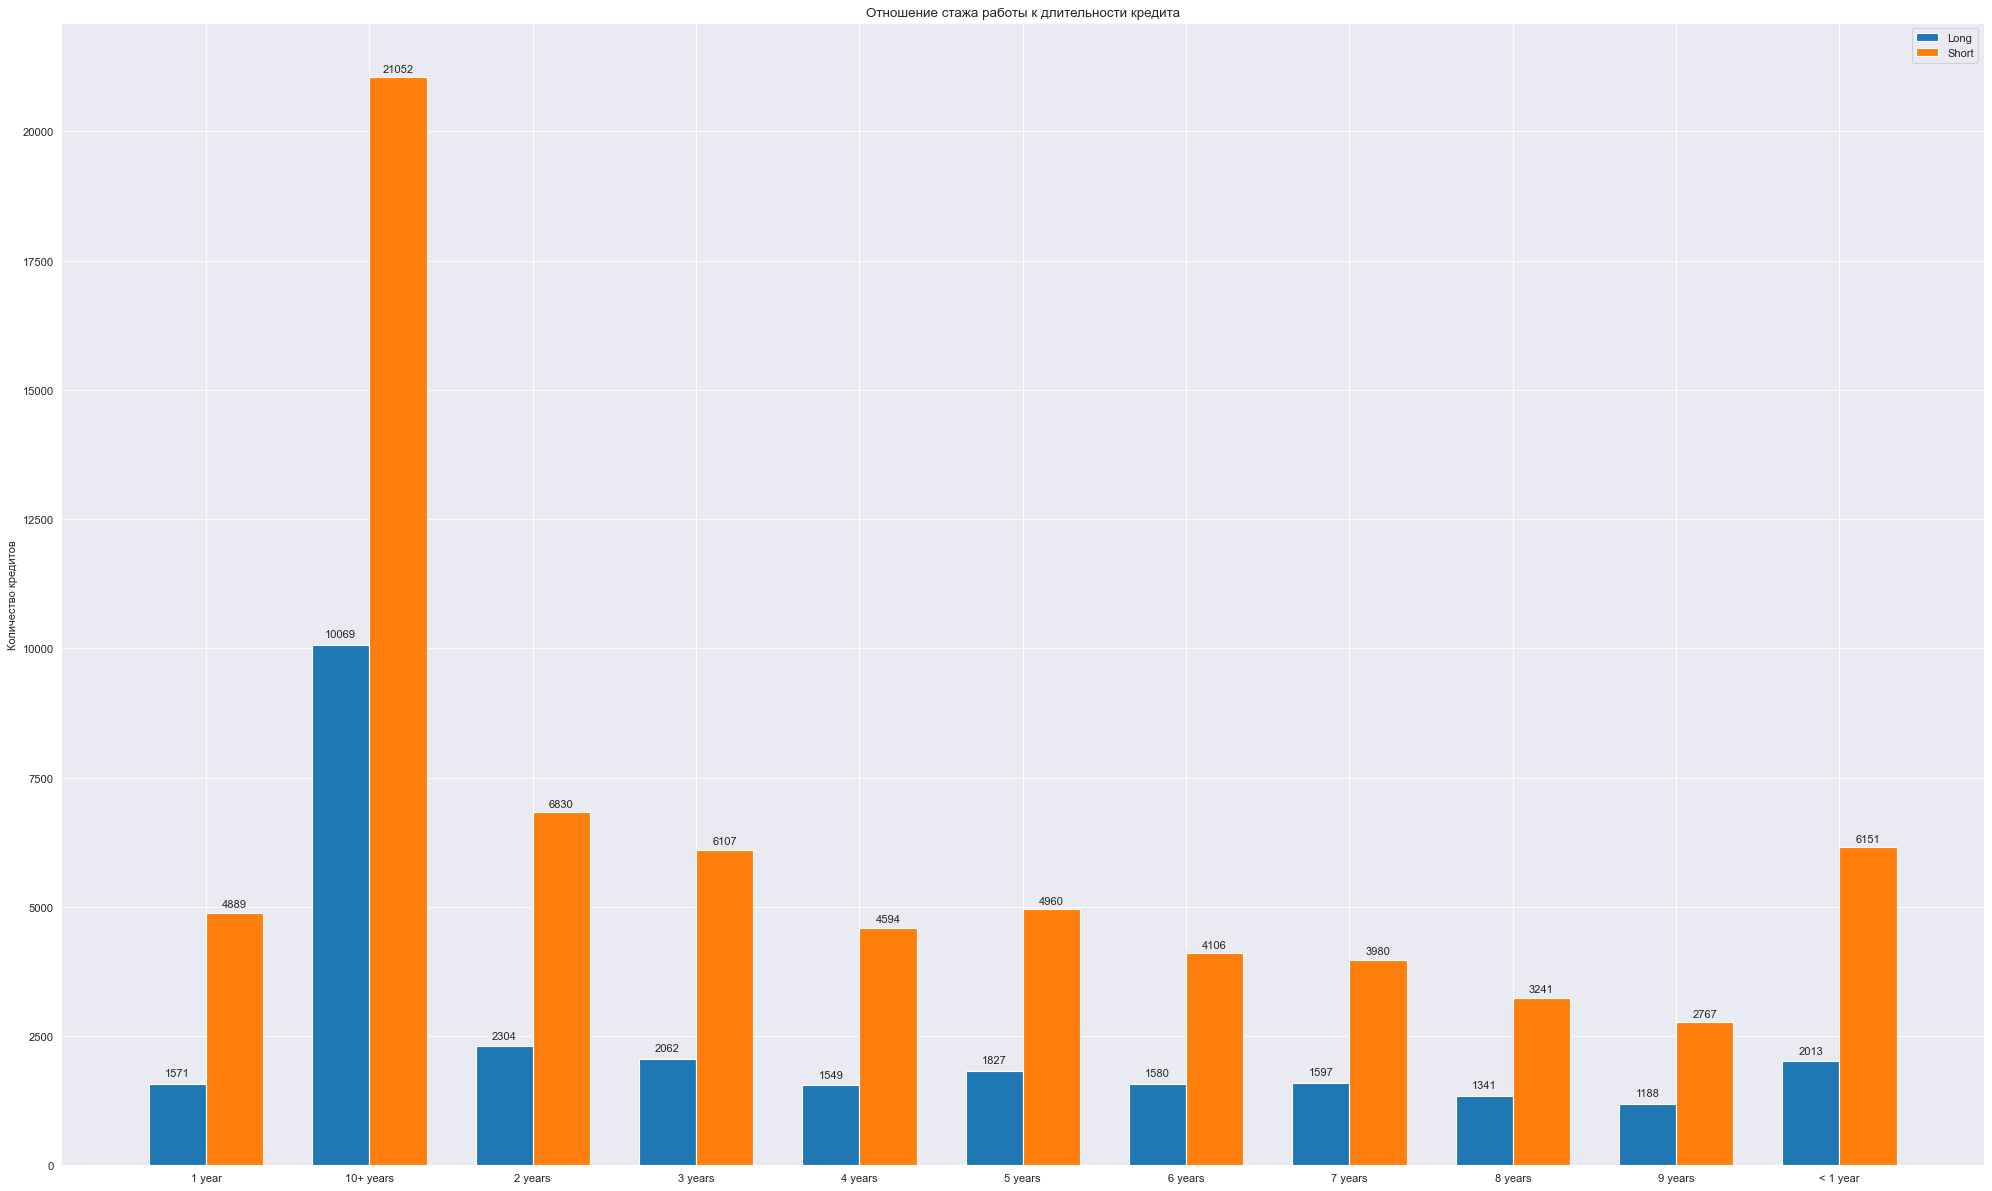

In [11]:
labels = years_term.index
x = np.arange(len(labels))
width = 0.35


fig = plt.figure(figsize=(25,15), dpi=80)
ax = fig.add_subplot()

rects1 = ax.bar(x - width/2, years_term["Long Term"], label="Long", width = 0.35)
rects2 = ax.bar(x + width/2, years_term["Short Term"], label="Short", width = 0.35)

ax.set_title('Отношение стажа работы к длительности кредита')
ax.set_ylabel('Количество кредитов')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

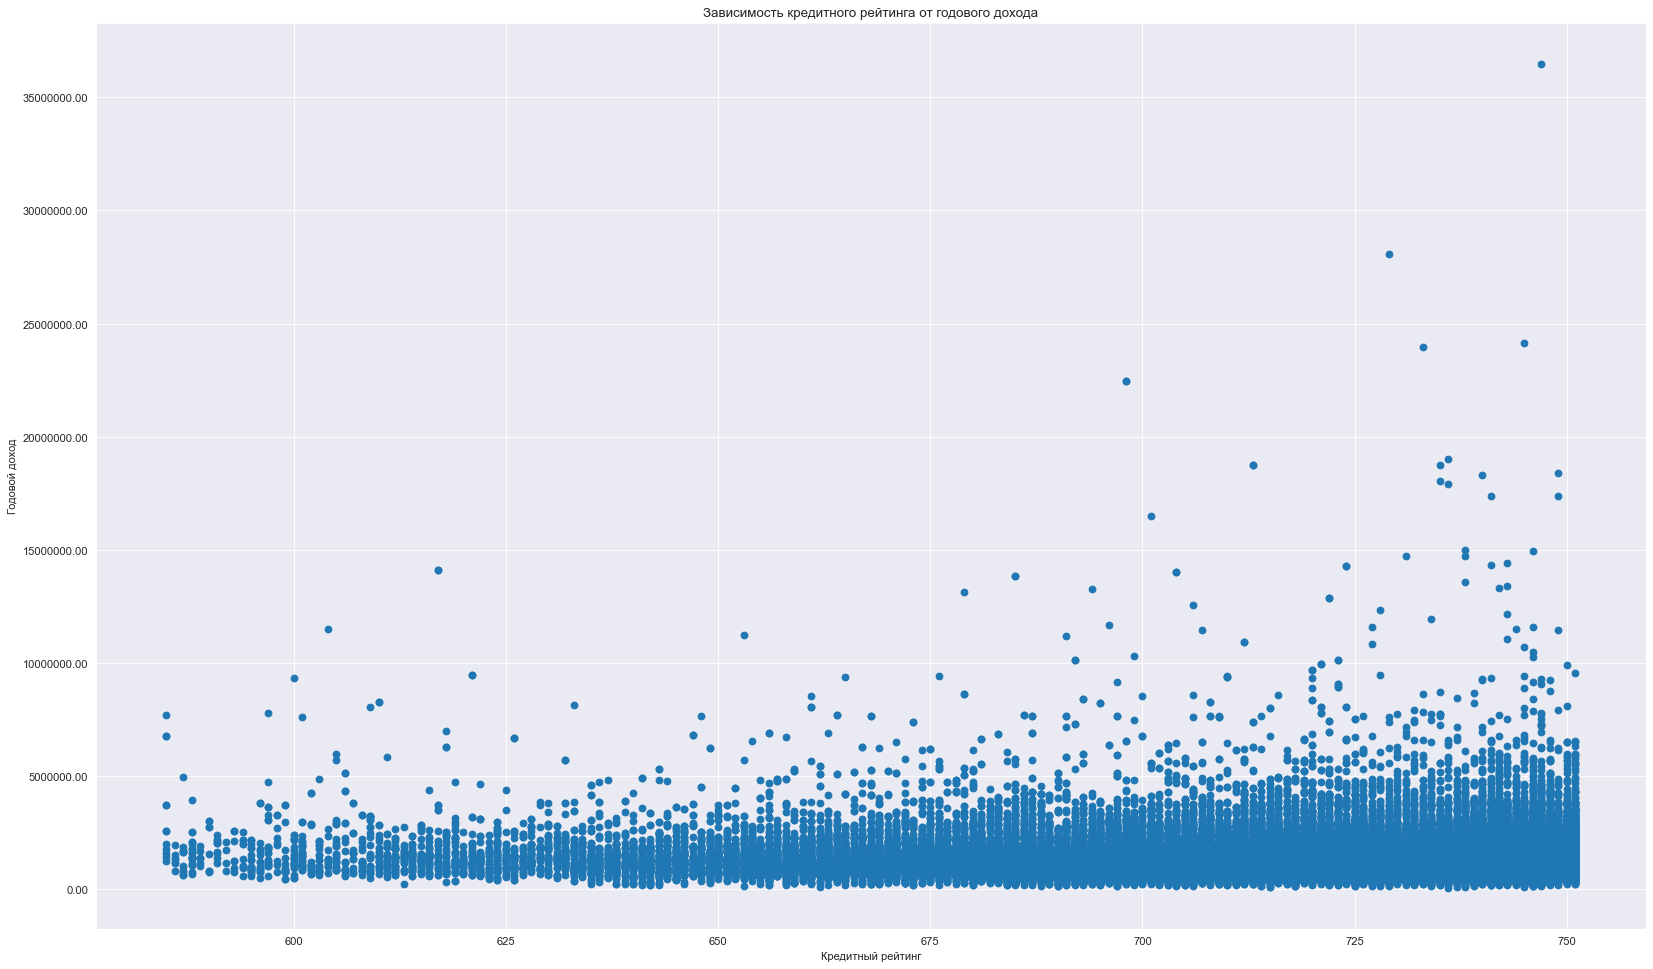

In [12]:
score_and_annual_inc = data_scoring[["Credit Score", "Annual Income"]].dropna().sort_values(by=["Credit Score"])
score_and_annual_inc = score_and_annual_inc[score_and_annual_inc["Credit Score"] <= 800]

fig = plt.figure(figsize=(25,15), dpi=80)
ax = fig.add_subplot()
ax.scatter(score_and_annual_inc["Credit Score"], score_and_annual_inc["Annual Income"])
ax.set_title("Зависимость кредитного рейтинга от годового дохода")
ax.set_ylabel("Годовой доход")
ax.set_xlabel("Кредитный рейтинг")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

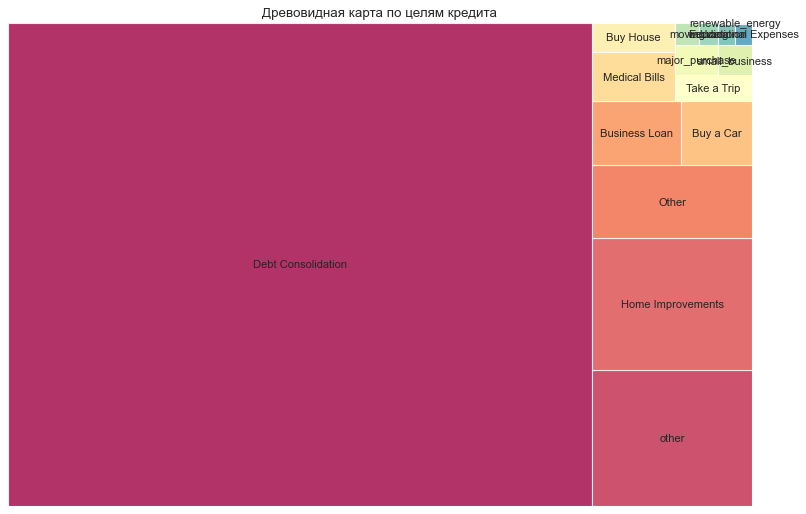

In [13]:
purpose = data_scoring["Purpose"].value_counts()
labels = purpose.index
sizes = purpose.values
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi=80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10})

plt.title('Древовидная карта по целям кредита')
plt.axis('off')
plt.show()

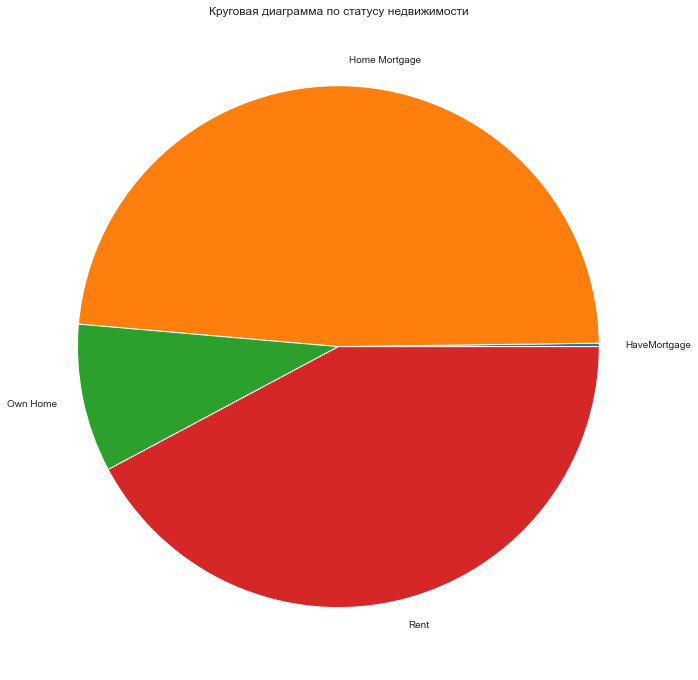

In [14]:
df = data_scoring.groupby('Home Ownership').size()

df.plot(kind='pie', subplots=True, figsize=(12, 12))
plt.title("Круговая диаграмма по статусу недвижимости")
plt.ylabel("")
plt.show()

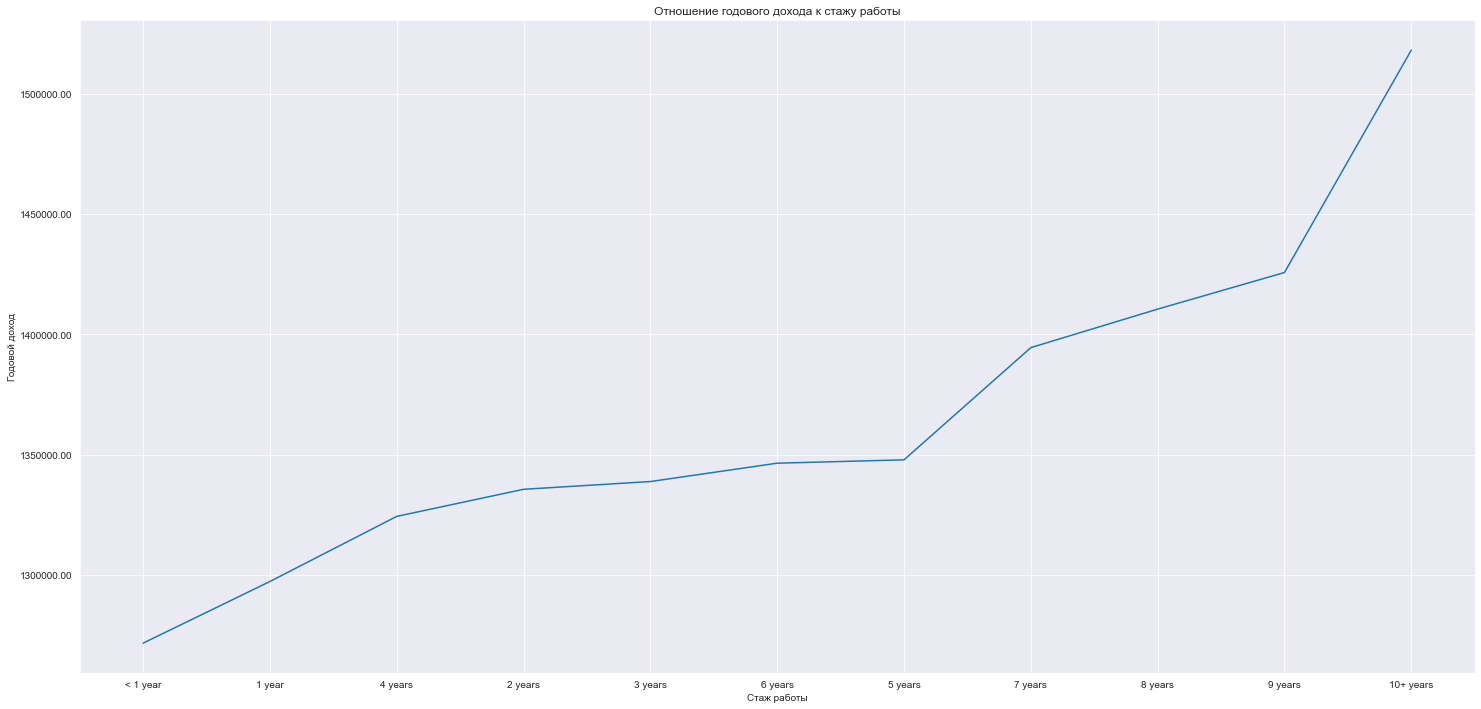

In [15]:
years_income = data_scoring[["Annual Income", "Years in current job"]].dropna().groupby("Years in current job").mean().sort_values(by=["Annual Income"])

fig = plt.figure(figsize=(25, 12))
ax = fig.add_subplot()

ax.plot(years_income.index, years_income["Annual Income"])

ax.set_title("Отношение годового дохода к стажу работы")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel("Годовой доход")
ax.set_xlabel("Стаж работы")

plt.show()

## Проверяем идентификаторы заемов

In [16]:
data_scoring["Loan ID"].describe()

count                                   100000
unique                                   81999
top       14dd8831-6af5-400b-83ec-68e61888a048
freq                                         2
Name: Loan ID, dtype: object

In [17]:
data_scoring["Loan ID"].isna().sum()

0

In [18]:
data_scoring["Loan ID"].nunique()

81999

In [19]:
duplicated_df = data_scoring[data_scoring["Loan ID"].duplicated(keep=False)].sort_values(by=["Loan ID"])
duplicated_df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
7415,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
10203,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72469,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
13362,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,715.00,3104144.00,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00
85520,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00
81716,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,613844,Long Term,678.00,2232120.00,10+ years,Home Mortgage,Debt Consolidation,47990.58,18.00,11.00,10,0,538023,1372162.00,0.00,0.00


In [20]:
duplicated_df.shape

(36002, 19)

In [21]:
duplicated_df[duplicated_df["Loan ID"] == "00069ff1-a877-4d35-81be-7cd359b99956"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
7415,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00


## Как мы видим, у нас есть повторяющиеся ID заемов. Проанализировав данные, можно удтверждать, что это одни и те же заемы

### Стоит заметить, что в некоторых повторяющихся ID у нас разные данные. Какая-то из двух записей, например, имеет кредитный счет NaN, в то время как другая имеет вполне адекватное значение. Из таких данных стоит отсеять наилучшие

In [22]:
duplicated_df[duplicated_df["Credit Score"].isna()].sort_values(by=["Loan ID"])

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7415,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
98518,00321acd-d853-44bf-80aa-e17b9be0e5ed,a5625033-465a-4b55-9457-ca95ed832a71,Fully Paid,261888,Short Term,NaN,NaN,10+ years,Rent,other,20468.89,15.20,NaN,7,0,209342,579898.00,0.00,0.00
72600,0044fa26-0100-4c7e-adb2-fd03e32beb79,5a6506e4-7a52-4184-a486-82ff18d8d821,Fully Paid,351604,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,35073.43,18.10,22.00,16,0,736820,981772.00,0.00,0.00
91504,0048b1fd-56c0-45b0-9f84-732dd03dd61c,e4dcce96-d540-4fec-ba57-7d3189998478,Fully Paid,55726,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,3082.94,20.10,NaN,9,1,81206,329934.00,1.00,0.00
24639,0069060d-5b95-433c-8009-453745cdd588,e3046060-14f0-427d-81b4-1ca6fe7f6b48,Fully Paid,619828,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,33121.56,23.10,NaN,15,0,290833,420442.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ffd64994-2fe2-4ff8-a39d-4091e9798468,003e89d5-2e91-4256-954f-dc5313c83c05,Fully Paid,166232,Short Term,NaN,NaN,2 years,Rent,Debt Consolidation,12557.67,16.80,NaN,5,0,129998,152328.00,0.00,0.00
81119,ffda589a-0175-4ea5-8ace-c3cc12a380fa,ef185a7b-a395-47a5-a9c3-bb15509dde16,Fully Paid,106744,Short Term,NaN,NaN,3 years,Home Mortgage,Other,12403.20,9.90,NaN,8,0,135793,175692.00,0.00,0.00
67763,ffee9aee-ac81-4237-87d2-6b6e625139ad,f397c9b0-e7e4-4319-841e-973a46fff949,Fully Paid,151580,Short Term,NaN,NaN,1 year,Rent,other,5541.92,12.00,56.00,3,0,54739,80234.00,0.00,0.00
12196,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,Fully Paid,112750,Short Term,NaN,NaN,3 years,Rent,Debt Consolidation,1422.15,10.00,NaN,8,0,65683,277574.00,0.00,0.00


In [23]:
print("Количество пустых строк в столбце Credit score: ", len(duplicated_df[duplicated_df["Credit Score"].isna()].sort_values(by=["Loan ID"])))

Количество пустых строк в столбце Credit score:  4207


In [24]:
print("Количество пустых и УНИКАЛЬНЫХ строк в столбце Credit score: ", duplicated_df[duplicated_df["Credit Score"].isna()].sort_values(by=["Loan ID"])["Loan ID"].nunique())

Количество пустых и УНИКАЛЬНЫХ строк в столбце Credit score:  4207


In [25]:
duplicated_df[duplicated_df["Loan ID"].isin(duplicated_df["Loan ID"][duplicated_df["Credit Score"].isna()])]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
7415,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
98518,00321acd-d853-44bf-80aa-e17b9be0e5ed,a5625033-465a-4b55-9457-ca95ed832a71,Fully Paid,261888,Short Term,NaN,NaN,10+ years,Rent,other,20468.89,15.20,NaN,7,0,209342,579898.00,0.00,0.00
97175,00321acd-d853-44bf-80aa-e17b9be0e5ed,a5625033-465a-4b55-9457-ca95ed832a71,Fully Paid,261888,Short Term,698.00,1357056.00,10+ years,Rent,other,20468.89,15.20,NaN,7,0,209342,579898.00,0.00,0.00
72600,0044fa26-0100-4c7e-adb2-fd03e32beb79,5a6506e4-7a52-4184-a486-82ff18d8d821,Fully Paid,351604,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,35073.43,18.10,22.00,16,0,736820,981772.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67763,ffee9aee-ac81-4237-87d2-6b6e625139ad,f397c9b0-e7e4-4319-841e-973a46fff949,Fully Paid,151580,Short Term,NaN,NaN,1 year,Rent,other,5541.92,12.00,56.00,3,0,54739,80234.00,0.00,0.00
12196,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,Fully Paid,112750,Short Term,NaN,NaN,3 years,Rent,Debt Consolidation,1422.15,10.00,NaN,8,0,65683,277574.00,0.00,0.00
12745,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,Fully Paid,112750,Short Term,722.00,272631.00,3 years,Rent,Debt Consolidation,1422.15,10.00,NaN,8,0,65683,277574.00,0.00,0.00
13362,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,715.00,3104144.00,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00


In [26]:
duplicated_df[duplicated_df["Credit Score"].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7415,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
98518,00321acd-d853-44bf-80aa-e17b9be0e5ed,a5625033-465a-4b55-9457-ca95ed832a71,Fully Paid,261888,Short Term,NaN,NaN,10+ years,Rent,other,20468.89,15.20,NaN,7,0,209342,579898.00,0.00,0.00
72600,0044fa26-0100-4c7e-adb2-fd03e32beb79,5a6506e4-7a52-4184-a486-82ff18d8d821,Fully Paid,351604,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,35073.43,18.10,22.00,16,0,736820,981772.00,0.00,0.00
91504,0048b1fd-56c0-45b0-9f84-732dd03dd61c,e4dcce96-d540-4fec-ba57-7d3189998478,Fully Paid,55726,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,3082.94,20.10,NaN,9,1,81206,329934.00,1.00,0.00
24639,0069060d-5b95-433c-8009-453745cdd588,e3046060-14f0-427d-81b4-1ca6fe7f6b48,Fully Paid,619828,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,33121.56,23.10,NaN,15,0,290833,420442.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ffd64994-2fe2-4ff8-a39d-4091e9798468,003e89d5-2e91-4256-954f-dc5313c83c05,Fully Paid,166232,Short Term,NaN,NaN,2 years,Rent,Debt Consolidation,12557.67,16.80,NaN,5,0,129998,152328.00,0.00,0.00
81119,ffda589a-0175-4ea5-8ace-c3cc12a380fa,ef185a7b-a395-47a5-a9c3-bb15509dde16,Fully Paid,106744,Short Term,NaN,NaN,3 years,Home Mortgage,Other,12403.20,9.90,NaN,8,0,135793,175692.00,0.00,0.00
67763,ffee9aee-ac81-4237-87d2-6b6e625139ad,f397c9b0-e7e4-4319-841e-973a46fff949,Fully Paid,151580,Short Term,NaN,NaN,1 year,Rent,other,5541.92,12.00,56.00,3,0,54739,80234.00,0.00,0.00
12196,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,Fully Paid,112750,Short Term,NaN,NaN,3 years,Rent,Debt Consolidation,1422.15,10.00,NaN,8,0,65683,277574.00,0.00,0.00


In [27]:
index_to_delete = duplicated_df["Loan ID"][duplicated_df["Credit Score"].isna()].index
index_to_delete

Int64Index([ 7415, 98518, 72600, 91504, 24639, 10729, 31139, 47277, 42966,
            62155,
            ...
            80719, 84667, 10939, 98116, 70568, 34931, 81119, 67763, 12196,
            85520],
           dtype='int64', length=4207)

In [28]:
data_scoring.drop(index=index_to_delete, inplace=True)
data_scoring

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6,1,228190,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35,0,229976,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18,1,297996,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9,0,256329,386958.00,0.00,0.00
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,NaN,6,0,215308,272448.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070,Short Term,725.00,475437.00,7 years,Own Home,other,2202.86,22.30,NaN,5,0,47766,658548.00,0.00,0.00
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.00,1289416.00,1 year,Rent,Debt Consolidation,13109.05,9.40,21.00,22,0,153045,509234.00,0.00,0.00
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.00,1150545.00,6 years,Rent,Debt Consolidation,7315.57,18.80,18.00,12,1,109554,537548.00,1.00,0.00
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.00,1717524.00,9 years,Rent,Debt Consolidation,9890.07,15.00,NaN,8,0,404225,738254.00,0.00,0.00


In [29]:
100_000 - len(data_scoring)

4207

Удалили 4207 заемов с повторяющимися Loan ID, с пустым Credit Score. Оставив при этом строку-дубликат с имеющимися данными по Кредитному счету

## В выбранных мной данных пустой кредитный рейтинг всегда только у одной из двух записей, что позволяет нам сразу удалить 4207 повторяющихся заемов с худшими данными по сравнению с его дубликатом

In [30]:
duplicated_df.dropna(subset=['Credit Score'], inplace=True)
duplicated_df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
10203,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
98875,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49019,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
72469,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
13362,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,715.00,3104144.00,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00
81716,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,613844,Long Term,678.00,2232120.00,10+ years,Home Mortgage,Debt Consolidation,47990.58,18.00,11.00,10,0,538023,1372162.00,0.00,0.00


In [31]:
len(duplicated_df) + 4207

36002

In [32]:
duplicated_df.duplicated(keep=False)

59577    False
69442     True
10203     True
3978      True
98875     True
         ...  
49019     True
72469     True
13362    False
81716     True
65354     True
Length: 31795, dtype: bool

# Проверим другие данные

In [33]:
len(duplicated_df[duplicated_df["Current Loan Amount"]==0]), len(duplicated_df[duplicated_df["Current Loan Amount"].isna()])

(0, 0)

In [34]:
duplicated_df["Current Loan Amount"].describe().apply("{0:.5f}".format)

count       31795.00000
mean     11549910.71543
std      31502573.13199
min         15422.00000
25%        187176.00000
50%        329978.00000
75%        551958.00000
max      99999999.00000
Name: Current Loan Amount, dtype: object

In [35]:
len(duplicated_df[duplicated_df["Annual Income"]==0]), len(duplicated_df[duplicated_df["Annual Income"].isna()])

(0, 0)

In [36]:
duplicated_df["Annual Income"].describe().apply("{0:.5f}".format)

count       31795.00000
mean      1385441.28948
std        903442.30481
min        111245.00000
25%        855712.50000
50%       1187424.00000
75%       1663279.00000
max      22448880.00000
Name: Annual Income, dtype: object

In [37]:
len(duplicated_df[duplicated_df["Credit Score"]==0]), len(duplicated_df[duplicated_df["Credit Score"].isna()])

(0, 0)

In [38]:
duplicated_df["Credit Score"].describe().apply("{0:.5f}".format)

count    31795.00000
mean       700.19818
std         24.37921
min        585.00000
25%        690.00000
50%        708.00000
75%        718.00000
max        725.00000
Name: Credit Score, dtype: object

In [39]:
len(duplicated_df[duplicated_df["Monthly Debt"]==0]), len(duplicated_df[duplicated_df["Monthly Debt"].isna()])

(14, 0)

In [40]:
duplicated_df["Monthly Debt"].describe().apply("{0:.5f}".format)

count     31795.00000
mean      19122.40764
std       12418.03149
min           0.00000
25%       10624.42000
50%       16946.10000
75%       24827.87000
max      173265.56000
Name: Monthly Debt, dtype: object

In [41]:
len(duplicated_df[duplicated_df["Number of Open Accounts"] == 0]), len(duplicated_df[duplicated_df["Number of Open Accounts"].isna()]),\
duplicated_df["Number of Open Accounts"].describe().apply("{0:.5f}".format)

(0,
 0,
 count    31795.00000
 mean        11.19434
 std          5.15571
 min          1.00000
 25%          8.00000
 50%         10.00000
 75%         14.00000
 max         56.00000
 Name: Number of Open Accounts, dtype: object)

In [42]:
len(duplicated_df[duplicated_df["Years of Credit History"] == 0]), len(duplicated_df[duplicated_df["Years of Credit History"].isna()]),\
duplicated_df["Years of Credit History"].describe().apply("{0:.5f}".format)

(0,
 0,
 count    31795.00000
 mean        17.75668
 std          6.85901
 min          3.70000
 25%         13.00000
 50%         16.60000
 75%         21.20000
 max         65.00000
 Name: Years of Credit History, dtype: object)

In [43]:
len(duplicated_df[duplicated_df["Number of Credit Problems"] == 0]), len(duplicated_df[duplicated_df["Number of Credit Problems"].isna()]),\
duplicated_df["Number of Credit Problems"].describe().apply("{0:.5f}".format)

(26543,
 0,
 count    31795.00000
 mean         0.20104
 std          0.52631
 min          0.00000
 25%          0.00000
 50%          0.00000
 75%          0.00000
 max         11.00000
 Name: Number of Credit Problems, dtype: object)

In [44]:
len(duplicated_df[duplicated_df["Current Credit Balance"] == 0]), len(duplicated_df[duplicated_df["Current Credit Balance"].isna()]),\
duplicated_df["Current Credit Balance"].describe().apply("{0:.5f}".format)

(159,
 0,
 count       31795.00000
 mean       299212.73801
 std        394380.49777
 min             0.00000
 25%        109658.50000
 50%        209703.00000
 75%        372428.50000
 max      12986956.00000
 Name: Current Credit Balance, dtype: object)

In [45]:
len(duplicated_df[duplicated_df["Maximum Open Credit"] == 0]), len(duplicated_df[duplicated_df["Maximum Open Credit"].isna()]),\
duplicated_df["Maximum Open Credit"].describe().apply("{0:.5f}".format)

(190,
 0,
 count        31795.00000
 mean        613216.57688
 std        2165646.15273
 min              0.00000
 25%         243298.00000
 50%         424050.00000
 75%         709544.00000
 max      192284158.00000
 Name: Maximum Open Credit, dtype: object)

In [46]:
len(duplicated_df[duplicated_df["Bankruptcies"] == 0]), len(duplicated_df[duplicated_df["Bankruptcies"].isna()]),\
duplicated_df["Bankruptcies"].describe().apply("{0:.5f}".format)

(27669,
 51,
 count    31744.00000
 mean         0.13779
 std          0.38139
 min          0.00000
 25%          0.00000
 50%          0.00000
 75%          0.00000
 max          6.00000
 Name: Bankruptcies, dtype: object)

In [47]:
len(duplicated_df[duplicated_df["Tax Liens"] == 0]), len(duplicated_df[duplicated_df["Tax Liens"].isna()]),\
duplicated_df["Tax Liens"].describe().apply("{0:.5f}".format)

(31019,
 3,
 count    31792.00000
 mean         0.03598
 std          0.27946
 min          0.00000
 25%          0.00000
 50%          0.00000
 75%          0.00000
 max         11.00000
 Name: Tax Liens, dtype: object)

In [48]:
duplicated_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [49]:
duplicated_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
10203,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
98875,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00


## Было замечено несколько следующих проблем:
* Некоторые поля Current Loan Amount имеют значения 99999999. Это опечатка или же данные верны
* В некоторых записях Monthly Debt (размер ежемесячного платежа по текущим кредитам) равен нулю
* Current Credit Balance (суммарный текущий долг) равен нулю
* Maximum Open Credit равен нулю
* Bankruptcies пустые значения
* Tax Liens 3 пустых значения



### Проверяем  Current Loan Amount

In [50]:
duplicated_df["Current Loan Amount"].sort_values(ascending=False)

74399    99999999
88638    99999999
74423    99999999
15357    99999999
96402    99999999
           ...   
32159       21472
79041       21450
81961       21450
79169       15422
19847       15422
Name: Current Loan Amount, Length: 31795, dtype: int64

Количество строк, где Current Loan Amount равен 99999999

In [51]:
(duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].max()).sum()

3579

In [52]:
duplicated_df[duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].max()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
68617,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,Fully Paid,99999999,Short Term,715.00,1642303.00,10+ years,Rent,Debt Consolidation,41878.47,18.00,NaN,22,0,401565,756052.00,0.00,0.00
5482,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,Fully Paid,99999999,Long Term,705.00,2070145.00,6 years,Home Mortgage,major_purchase,16785.55,23.60,54.00,10,1,169214,473242.00,1.00,0.00
98000,0031dab0-c21a-4f2f-8a5f-0eb860c4ed2a,65d14058-a3d2-4e37-b425-c30b658b81c6,Fully Paid,99999999,Short Term,712.00,887547.00,5 years,Rent,Debt Consolidation,16197.69,19.40,14.00,29,0,191292,339724.00,0.00,0.00
54650,004b036e-9a85-48d3-acb9-e4a8030244fa,eaf32fa6-4746-4db9-981e-952878094d9b,Fully Paid,99999999,Long Term,650.00,1280239.00,10+ years,Home Mortgage,other,26885.19,17.30,NaN,11,0,495216,894542.00,0.00,0.00
7540,007d7fc3-4a85-4526-81c7-7d44d8d65374,007f3a61-d144-4014-ac01-e724dd9cbc01,Fully Paid,99999999,Short Term,702.00,1078573.00,10+ years,Home Mortgage,Business Loan,6912.01,7.40,NaN,6,0,100358,129426.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94354,ff713abe-a76f-4a57-aeb0-6db59c68f5cf,f894019a-6341-49d7-8953-2554a3f8c3ac,Fully Paid,99999999,Long Term,643.00,1167132.00,10+ years,Home Mortgage,Debt Consolidation,30734.40,19.80,14.00,11,0,272954,529386.00,0.00,0.00
60293,ffb6301e-2357-418e-8bbc-4df70161d288,158aba71-2aaa-486c-a913-94421e2859b5,Fully Paid,99999999,Short Term,723.00,1747962.00,5 years,Rent,Debt Consolidation,38018.24,16.60,NaN,8,0,53010,276452.00,0.00,0.00
67485,ffcdb42b-44ad-4592-a7b2-727a6c336492,f759bbc5-e28c-4b40-8203-6e795f1b064d,Fully Paid,99999999,Long Term,706.00,673854.00,5 years,Rent,Debt Consolidation,12129.22,13.00,NaN,11,0,316654,689172.00,0.00,0.00
25544,ffd44cce-181c-4e79-b65f-1c5fa44df3ff,eb8e6f9d-5ce2-46b1-946b-4aed14c58b50,Fully Paid,99999999,Short Term,711.00,870998.00,10+ years,Own Home,Debt Consolidation,8492.05,18.50,NaN,8,0,282739,387904.00,0.00,0.00


Смотрим на годовой доход у записей с Current Loan Amount равным 99999999

In [53]:
duplicated_df[duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].max()]["Annual Income"].mean()

1364489.7194747136

In [54]:
duplicated_df[duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].min()]["Credit Score"].mean()

718.0

Смотрим на строки дубликаты с Current Loan Amount равным 99999999

In [55]:
loan_ids_with_max_loan_amount = duplicated_df[duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].max()]["Loan ID"]

In [56]:
duplicated_where_curr_loan_is_max = duplicated_df[duplicated_df["Loan ID"].isin(loan_ids_with_max_loan_amount)]
duplicated_where_curr_loan_is_max

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
12966,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,Fully Paid,463650,Short Term,715.00,1642303.00,10+ years,Rent,Debt Consolidation,41878.47,18.00,NaN,22,0,401565,756052.00,0.00,0.00
68617,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,Fully Paid,99999999,Short Term,715.00,1642303.00,10+ years,Rent,Debt Consolidation,41878.47,18.00,NaN,22,0,401565,756052.00,0.00,0.00
5482,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,Fully Paid,99999999,Long Term,705.00,2070145.00,6 years,Home Mortgage,major_purchase,16785.55,23.60,54.00,10,1,169214,473242.00,1.00,0.00
51941,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,Fully Paid,762696,Long Term,705.00,2070145.00,6 years,Home Mortgage,major_purchase,16785.55,23.60,54.00,10,1,169214,473242.00,1.00,0.00
98000,0031dab0-c21a-4f2f-8a5f-0eb860c4ed2a,65d14058-a3d2-4e37-b425-c30b658b81c6,Fully Paid,99999999,Short Term,712.00,887547.00,5 years,Rent,Debt Consolidation,16197.69,19.40,14.00,29,0,191292,339724.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,ffcdb42b-44ad-4592-a7b2-727a6c336492,f759bbc5-e28c-4b40-8203-6e795f1b064d,Fully Paid,295372,Long Term,706.00,673854.00,5 years,Rent,Debt Consolidation,12129.22,13.00,NaN,11,0,316654,689172.00,0.00,0.00
80465,ffd44cce-181c-4e79-b65f-1c5fa44df3ff,eb8e6f9d-5ce2-46b1-946b-4aed14c58b50,Fully Paid,341770,Short Term,711.00,870998.00,10+ years,Own Home,Debt Consolidation,8492.05,18.50,NaN,8,0,282739,387904.00,0.00,0.00
25544,ffd44cce-181c-4e79-b65f-1c5fa44df3ff,eb8e6f9d-5ce2-46b1-946b-4aed14c58b50,Fully Paid,99999999,Short Term,711.00,870998.00,10+ years,Own Home,Debt Consolidation,8492.05,18.50,NaN,8,0,282739,387904.00,0.00,0.00
92843,ffd506f1-3ebb-485d-b4ee-14e4e71dcbb1,04575f73-6e3d-4511-b7f5-6417e6fc3703,Fully Paid,99999999,Long Term,703.00,673550.00,10+ years,Home Mortgage,Debt Consolidation,8604.53,23.60,50.00,10,1,205561,398046.00,1.00,0.00


Уникальных из них ровно половина, что значит на одну запись с Current Loan Amount равным 99999999 есть другая запись с более адекватными значениями

In [57]:
duplicated_df[duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].max()].sort_values(by="Loan ID")["Loan ID"].nunique()

3579

### Удаляем строки с Current Loan Amount равным 99999999, у которых есть дубликат с аналогичным Loan ID с более адекватным значением

In [58]:
duplicated_df[duplicated_df["Current Loan Amount"] == duplicated_df["Current Loan Amount"].max()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
68617,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,Fully Paid,99999999,Short Term,715.00,1642303.00,10+ years,Rent,Debt Consolidation,41878.47,18.00,NaN,22,0,401565,756052.00,0.00,0.00
5482,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,Fully Paid,99999999,Long Term,705.00,2070145.00,6 years,Home Mortgage,major_purchase,16785.55,23.60,54.00,10,1,169214,473242.00,1.00,0.00
98000,0031dab0-c21a-4f2f-8a5f-0eb860c4ed2a,65d14058-a3d2-4e37-b425-c30b658b81c6,Fully Paid,99999999,Short Term,712.00,887547.00,5 years,Rent,Debt Consolidation,16197.69,19.40,14.00,29,0,191292,339724.00,0.00,0.00
54650,004b036e-9a85-48d3-acb9-e4a8030244fa,eaf32fa6-4746-4db9-981e-952878094d9b,Fully Paid,99999999,Long Term,650.00,1280239.00,10+ years,Home Mortgage,other,26885.19,17.30,NaN,11,0,495216,894542.00,0.00,0.00
7540,007d7fc3-4a85-4526-81c7-7d44d8d65374,007f3a61-d144-4014-ac01-e724dd9cbc01,Fully Paid,99999999,Short Term,702.00,1078573.00,10+ years,Home Mortgage,Business Loan,6912.01,7.40,NaN,6,0,100358,129426.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94354,ff713abe-a76f-4a57-aeb0-6db59c68f5cf,f894019a-6341-49d7-8953-2554a3f8c3ac,Fully Paid,99999999,Long Term,643.00,1167132.00,10+ years,Home Mortgage,Debt Consolidation,30734.40,19.80,14.00,11,0,272954,529386.00,0.00,0.00
60293,ffb6301e-2357-418e-8bbc-4df70161d288,158aba71-2aaa-486c-a913-94421e2859b5,Fully Paid,99999999,Short Term,723.00,1747962.00,5 years,Rent,Debt Consolidation,38018.24,16.60,NaN,8,0,53010,276452.00,0.00,0.00
67485,ffcdb42b-44ad-4592-a7b2-727a6c336492,f759bbc5-e28c-4b40-8203-6e795f1b064d,Fully Paid,99999999,Long Term,706.00,673854.00,5 years,Rent,Debt Consolidation,12129.22,13.00,NaN,11,0,316654,689172.00,0.00,0.00
25544,ffd44cce-181c-4e79-b65f-1c5fa44df3ff,eb8e6f9d-5ce2-46b1-946b-4aed14c58b50,Fully Paid,99999999,Short Term,711.00,870998.00,10+ years,Own Home,Debt Consolidation,8492.05,18.50,NaN,8,0,282739,387904.00,0.00,0.00


In [59]:
index_to_delete = duplicated_where_curr_loan_is_max[duplicated_where_curr_loan_is_max["Current Loan Amount"] == duplicated_where_curr_loan_is_max["Current Loan Amount"].max()].index
index_to_delete

Int64Index([68617,  5482, 98000, 54650,  7540, 73477,  7907, 13288,  9274,
            94266,
            ...
            90985, 98632, 13808, 45000, 69725, 94354, 60293, 67485, 25544,
            92843],
           dtype='int64', length=3579)

In [60]:
duplicated_df.drop(index=index_to_delete, inplace=True)
data_scoring.drop(index=index_to_delete, inplace=True)

In [61]:
duplicated_df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
10203,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
98875,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49019,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
72469,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
13362,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,715.00,3104144.00,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00
81716,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,613844,Long Term,678.00,2232120.00,10+ years,Home Mortgage,Debt Consolidation,47990.58,18.00,11.00,10,0,538023,1372162.00,0.00,0.00


Удалили повторяющиеся строки с Current Loan Amount = 99999999

In [62]:
duplicated_df["Current Loan Amount"].max()

789250

## Проверяем Monthly Debt равным 0

In [63]:
duplicated_df[duplicated_df["Monthly Debt"] == 0]["Loan ID"]

78116    03740982-c6b8-487a-a220-5fa036fb15da
93067    03740982-c6b8-487a-a220-5fa036fb15da
32374    04fff06e-7420-4978-84ce-5e359639afc2
31830    2d4c5b7d-76ee-437b-8811-563f37990acf
16765    2d4c5b7d-76ee-437b-8811-563f37990acf
35455    49bdfa6c-c6e0-4ecc-826c-e7c3898475fc
76333    49bdfa6c-c6e0-4ecc-826c-e7c3898475fc
8050     6eb14cde-2de6-48df-a6dc-72527642d105
70528    9acb87c7-b7a8-433d-9250-5a75e169bb04
10740    d5305fe8-6658-4dd5-9327-caa3238c354a
49933    ec2aabb1-fd0d-4770-b638-72509c189dc8
7573     ec2aabb1-fd0d-4770-b638-72509c189dc8
89759    f1c9adc7-b13b-4e2e-8b72-9d8cec4d2d1a
72526    f20384b8-e589-4681-9d43-8348745b2471
Name: Loan ID, dtype: object

In [64]:
duplicated_df[duplicated_df["Loan ID"].isin(duplicated_df[duplicated_df["Monthly Debt"] == 0]["Loan ID"])]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
78116,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
93067,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
32374,04fff06e-7420-4978-84ce-5e359639afc2,2866193a-fb98-4b85-8573-66c6709d1206,Fully Paid,449812,Long Term,723.00,1165422.00,8 years,Home Mortgage,Buy House,0.00,18.60,8.00,7,0,0,0.00,0.00,0.00
31830,2d4c5b7d-76ee-437b-8811-563f37990acf,ff7e90be-3d74-4183-9ffc-c6c4267b8efd,Fully Paid,86812,Short Term,672.00,937270.00,10+ years,Rent,other,0.00,22.00,14.00,4,0,36233,310794.00,0.00,0.00
16765,2d4c5b7d-76ee-437b-8811-563f37990acf,ff7e90be-3d74-4183-9ffc-c6c4267b8efd,Fully Paid,86812,Short Term,672.00,937270.00,10+ years,Rent,other,0.00,22.00,14.00,4,0,36233,310794.00,0.00,0.00
35455,49bdfa6c-c6e0-4ecc-826c-e7c3898475fc,3f97e229-16b2-4792-93db-73bfc142ef1d,Fully Paid,182930,Short Term,710.00,233339.00,< 1 year,Own Home,other,0.00,21.60,16.00,4,0,0,0.00,0.00,0.00
76333,49bdfa6c-c6e0-4ecc-826c-e7c3898475fc,3f97e229-16b2-4792-93db-73bfc142ef1d,Fully Paid,182930,Short Term,710.00,233339.00,< 1 year,Own Home,other,0.00,21.60,16.00,4,0,0,0.00,0.00,0.00
8050,6eb14cde-2de6-48df-a6dc-72527642d105,260c52a3-46b8-4cdc-89e7-352960557344,Fully Paid,49478,Short Term,714.00,364819.00,< 1 year,Rent,Take a Trip,0.00,29.60,62.00,8,0,0,0.00,0.00,0.00
70528,9acb87c7-b7a8-433d-9250-5a75e169bb04,bd464f4f-0907-4d48-9401-3c564c01b063,Fully Paid,532576,Short Term,716.00,1154706.00,1 year,Rent,Other,0.00,11.90,NaN,1,0,0,0.00,0.00,0.00
10740,d5305fe8-6658-4dd5-9327-caa3238c354a,261a582c-18d4-455c-af2e-8f84b059364a,Fully Paid,75350,Short Term,704.00,867749.00,10+ years,Home Mortgage,Home Improvements,0.00,16.50,66.00,2,0,0,0.00,0.00,0.00


##### Значения Monthly Debt в дубликатах одинаковое, следовательно, выбрать наилучшую строку среди них невозможно. Оставляем данные без изменений. Удалим неуникальные значения позже

## Проверяем Current Credit Balance (суммарный текущий долг) равный нулю

In [65]:
duplicated_df["Current Credit Balance"]

59577    526414
69442    445987
10203    445987
3978      79382
98875     79382
          ...  
49019    135166
72469    135166
13362    176396
81716    538023
65354    538023
Name: Current Credit Balance, Length: 28216, dtype: int64

In [66]:
duplicated_df[duplicated_df["Current Credit Balance"] == 0]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
78116,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
93067,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
34293,044acca2-f015-45cf-a9bf-8a6fbef5fd7b,a3a97967-2ed0-495c-8eee-ffad59fb0f29,Fully Paid,178772,Short Term,722.00,2257903.00,6 years,Rent,other,52496.24,14.50,41.00,7,0,0,0.00,0.00,0.00
38222,044acca2-f015-45cf-a9bf-8a6fbef5fd7b,a3a97967-2ed0-495c-8eee-ffad59fb0f29,Fully Paid,178772,Short Term,722.00,2257903.00,6 years,Rent,other,52496.24,14.50,41.00,7,0,0,0.00,0.00,0.00
54450,04c4c65f-e283-4cf5-b6ec-d2c8c4d5231f,2fdd320f-99d7-4196-a9ad-2c2d359d8f77,Fully Paid,214940,Short Term,682.00,1299410.00,7 years,Home Mortgage,Medical Bills,3486.69,10.90,21.00,11,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75164,f5e69312-d2cb-471a-9321-e001ff5829f2,5ee02d94-a506-4929-9ef9-b28ad457fbb1,Fully Paid,227788,Short Term,709.00,2154638.00,1 year,Rent,Debt Consolidation,25855.58,16.40,33.00,4,0,0,0.00,0.00,0.00
89355,f8b10a7b-155b-4336-b266-c53b8d5fff7c,e2991f56-ea9f-4b29-b025-8a489b534c56,Fully Paid,768768,Short Term,703.00,2655744.00,10+ years,Rent,Home Improvements,35188.57,28.50,4.00,12,0,0,0.00,0.00,0.00
11966,f8b10a7b-155b-4336-b266-c53b8d5fff7c,e2991f56-ea9f-4b29-b025-8a489b534c56,Fully Paid,768768,Short Term,703.00,2655744.00,10+ years,Rent,Home Improvements,35188.57,28.50,4.00,12,0,0,0.00,0.00,0.00
61757,ff21cca8-c909-4c9d-9a9a-e071bd2c2548,b55f073c-16ff-4fb2-8e75-07f15a7675aa,Fully Paid,51942,Short Term,718.00,336395.00,NaN,Rent,Debt Consolidation,468.16,9.90,NaN,9,0,0,0.00,0.00,0.00


In [67]:
duplicated_df[duplicated_df["Loan ID"].isin(duplicated_df[duplicated_df["Current Credit Balance"] == 0]["Loan ID"])]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
78116,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
93067,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
34293,044acca2-f015-45cf-a9bf-8a6fbef5fd7b,a3a97967-2ed0-495c-8eee-ffad59fb0f29,Fully Paid,178772,Short Term,722.00,2257903.00,6 years,Rent,other,52496.24,14.50,41.00,7,0,0,0.00,0.00,0.00
38222,044acca2-f015-45cf-a9bf-8a6fbef5fd7b,a3a97967-2ed0-495c-8eee-ffad59fb0f29,Fully Paid,178772,Short Term,722.00,2257903.00,6 years,Rent,other,52496.24,14.50,41.00,7,0,0,0.00,0.00,0.00
54450,04c4c65f-e283-4cf5-b6ec-d2c8c4d5231f,2fdd320f-99d7-4196-a9ad-2c2d359d8f77,Fully Paid,214940,Short Term,682.00,1299410.00,7 years,Home Mortgage,Medical Bills,3486.69,10.90,21.00,11,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75164,f5e69312-d2cb-471a-9321-e001ff5829f2,5ee02d94-a506-4929-9ef9-b28ad457fbb1,Fully Paid,227788,Short Term,709.00,2154638.00,1 year,Rent,Debt Consolidation,25855.58,16.40,33.00,4,0,0,0.00,0.00,0.00
89355,f8b10a7b-155b-4336-b266-c53b8d5fff7c,e2991f56-ea9f-4b29-b025-8a489b534c56,Fully Paid,768768,Short Term,703.00,2655744.00,10+ years,Rent,Home Improvements,35188.57,28.50,4.00,12,0,0,0.00,0.00,0.00
11966,f8b10a7b-155b-4336-b266-c53b8d5fff7c,e2991f56-ea9f-4b29-b025-8a489b534c56,Fully Paid,768768,Short Term,703.00,2655744.00,10+ years,Rent,Home Improvements,35188.57,28.50,4.00,12,0,0,0.00,0.00,0.00
61757,ff21cca8-c909-4c9d-9a9a-e071bd2c2548,b55f073c-16ff-4fb2-8e75-07f15a7675aa,Fully Paid,51942,Short Term,718.00,336395.00,NaN,Rent,Debt Consolidation,468.16,9.90,NaN,9,0,0,0.00,0.00,0.00


In [68]:
duplicated_df[duplicated_df["Loan ID"] == "2985b43c-71f3-4a45-9b2f-1d330b2f85a2"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
61629,2985b43c-71f3-4a45-9b2f-1d330b2f85a2,889bfa9a-0cad-4166-8bba-4d44721eb260,Fully Paid,426646,Long Term,670.00,1124819.00,3 years,Home Mortgage,Debt Consolidation,6589.39,24.10,8.00,3,1,0,0.00,1.00,0.00
70676,2985b43c-71f3-4a45-9b2f-1d330b2f85a2,889bfa9a-0cad-4166-8bba-4d44721eb260,Fully Paid,426646,Long Term,670.00,1124819.00,3 years,Home Mortgage,Debt Consolidation,6589.39,24.10,8.00,3,1,0,0.00,1.00,0.00


Мы видим, что опять данные одинаковы и просто повторяются. Избавимся от дубликатов далее

## Проверяем Maximum Open Credit равен нулю

In [69]:
duplicated_df["Loan ID"][duplicated_df["Maximum Open Credit"] == 0]

95357    033e996f-b88d-4c66-b275-0dd614b0c7be
78116    03740982-c6b8-487a-a220-5fa036fb15da
93067    03740982-c6b8-487a-a220-5fa036fb15da
34293    044acca2-f015-45cf-a9bf-8a6fbef5fd7b
38222    044acca2-f015-45cf-a9bf-8a6fbef5fd7b
                         ...                 
75164    f5e69312-d2cb-471a-9321-e001ff5829f2
89355    f8b10a7b-155b-4336-b266-c53b8d5fff7c
11966    f8b10a7b-155b-4336-b266-c53b8d5fff7c
61757    ff21cca8-c909-4c9d-9a9a-e071bd2c2548
78576    ff21cca8-c909-4c9d-9a9a-e071bd2c2548
Name: Loan ID, Length: 165, dtype: object

In [70]:
duplicated_df[duplicated_df["Loan ID"].isin(duplicated_df["Loan ID"][duplicated_df["Maximum Open Credit"] == 0])]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
95357,033e996f-b88d-4c66-b275-0dd614b0c7be,993f047a-722f-4f90-9fa7-76b5c7069c52,Fully Paid,672078,Long Term,717.00,1354339.00,8 years,Home Mortgage,Debt Consolidation,8859.70,13.00,NaN,10,0,19,0.00,0.00,0.00
78116,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
93067,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
34293,044acca2-f015-45cf-a9bf-8a6fbef5fd7b,a3a97967-2ed0-495c-8eee-ffad59fb0f29,Fully Paid,178772,Short Term,722.00,2257903.00,6 years,Rent,other,52496.24,14.50,41.00,7,0,0,0.00,0.00,0.00
38222,044acca2-f015-45cf-a9bf-8a6fbef5fd7b,a3a97967-2ed0-495c-8eee-ffad59fb0f29,Fully Paid,178772,Short Term,722.00,2257903.00,6 years,Rent,other,52496.24,14.50,41.00,7,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75164,f5e69312-d2cb-471a-9321-e001ff5829f2,5ee02d94-a506-4929-9ef9-b28ad457fbb1,Fully Paid,227788,Short Term,709.00,2154638.00,1 year,Rent,Debt Consolidation,25855.58,16.40,33.00,4,0,0,0.00,0.00,0.00
89355,f8b10a7b-155b-4336-b266-c53b8d5fff7c,e2991f56-ea9f-4b29-b025-8a489b534c56,Fully Paid,768768,Short Term,703.00,2655744.00,10+ years,Rent,Home Improvements,35188.57,28.50,4.00,12,0,0,0.00,0.00,0.00
11966,f8b10a7b-155b-4336-b266-c53b8d5fff7c,e2991f56-ea9f-4b29-b025-8a489b534c56,Fully Paid,768768,Short Term,703.00,2655744.00,10+ years,Rent,Home Improvements,35188.57,28.50,4.00,12,0,0,0.00,0.00,0.00
61757,ff21cca8-c909-4c9d-9a9a-e071bd2c2548,b55f073c-16ff-4fb2-8e75-07f15a7675aa,Fully Paid,51942,Short Term,718.00,336395.00,NaN,Rent,Debt Consolidation,468.16,9.90,NaN,9,0,0,0.00,0.00,0.00


In [71]:
duplicated_df[duplicated_df["Loan ID"] == "03740982-c6b8-487a-a220-5fa036fb15da"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
78116,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00
93067,03740982-c6b8-487a-a220-5fa036fb15da,4f66b4f1-d21c-4679-a2fa-99d544876930,Fully Paid,243144,Short Term,706.00,788006.00,3 years,Rent,Other,0.00,21.60,13.00,3,0,0,0.00,0.00,0.00


Данные у дубликатов одинаковые, выбрать наилучшую строку невозможно, избавимся от повторения дальше

## Проверяем Bankruptcies пустые значения

In [72]:
duplicated_df[duplicated_df["Loan ID"].isin(duplicated_df["Loan ID"][duplicated_df["Bankruptcies"].isna()])]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
26593,0a4b752d-1b98-45a3-bbbf-0824013f7131,6056de3b-1fe4-4dcf-a01c-33c8a9391762,Fully Paid,221276,Short Term,720.00,4299795.00,9 years,Home Mortgage,Debt Consolidation,71663.25,37.10,0.00,18,0,2054375,5309700.00,NaN,0.00
30358,1afc02cf-9dff-4f8b-a234-5f8a0ccac6a7,7c6c523b-d3b4-40c7-988b-6619fdcfcab8,Fully Paid,264770,Short Term,694.00,2000795.00,< 1 year,Rent,wedding,30345.28,20.50,34.00,10,0,111682,240372.00,NaN,0.00
33594,481201d5-30c9-4caa-b789-ea851c121d3a,326b0c89-0f3f-412f-be28-eb7cc386d0a4,Fully Paid,193424,Short Term,717.00,949145.00,7 years,Own Home,Debt Consolidation,15819.02,17.60,0.00,11,0,489896,948574.00,NaN,0.00
12013,481201d5-30c9-4caa-b789-ea851c121d3a,326b0c89-0f3f-412f-be28-eb7cc386d0a4,Fully Paid,193424,Short Term,717.00,949145.00,7 years,Own Home,Debt Consolidation,15819.02,17.60,0.00,11,0,489896,948574.00,NaN,0.00
83915,59e904e8-940d-41fa-9da7-fd7cd65133af,00207e9c-8d26-4a7a-9246-31073587d3c1,Fully Paid,245586,Short Term,693.00,964136.00,2 years,Own Home,Debt Consolidation,16792.01,14.90,0.00,14,0,336186,417670.00,NaN,0.00
12252,59e904e8-940d-41fa-9da7-fd7cd65133af,00207e9c-8d26-4a7a-9246-31073587d3c1,Fully Paid,245586,Short Term,693.00,964136.00,2 years,Own Home,Debt Consolidation,16792.01,14.90,0.00,14,0,336186,417670.00,NaN,0.00
74124,63273a5f-3d04-4127-8b36-4e87d4381867,4d216e1f-2caf-4053-a141-345142eddf06,Fully Paid,265562,Short Term,715.00,2866815.00,2 years,Home Mortgage,Debt Consolidation,48974.78,20.90,0.00,16,0,1273893,2858592.00,NaN,0.00
96429,63273a5f-3d04-4127-8b36-4e87d4381867,4d216e1f-2caf-4053-a141-345142eddf06,Fully Paid,265562,Short Term,715.00,2866815.00,2 years,Home Mortgage,Debt Consolidation,48974.78,20.90,0.00,16,0,1273893,2858592.00,NaN,0.00
11582,700c35ba-44c0-485f-849d-19daacaf1ca7,8bf07241-67f3-4aa7-b936-bab9592688cd,Fully Paid,321926,Short Term,683.00,1204752.00,1 year,Home Mortgage,Debt Consolidation,15661.70,18.20,61.00,21,0,168302,304964.00,NaN,0.00
77899,74505179-3d8b-4a46-9101-a87d927160e8,28c3945a-2409-470e-a5d7-a463b98333cd,Fully Paid,223432,Short Term,661.00,1061226.00,1 year,Rent,Debt Consolidation,11673.60,30.40,26.00,8,0,426873,628056.00,NaN,0.00


In [73]:
duplicated_df[duplicated_df["Loan ID"] == "63273a5f-3d04-4127-8b36-4e87d4381867"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
74124,63273a5f-3d04-4127-8b36-4e87d4381867,4d216e1f-2caf-4053-a141-345142eddf06,Fully Paid,265562,Short Term,715.00,2866815.00,2 years,Home Mortgage,Debt Consolidation,48974.78,20.90,0.00,16,0,1273893,2858592.00,NaN,0.00
96429,63273a5f-3d04-4127-8b36-4e87d4381867,4d216e1f-2caf-4053-a141-345142eddf06,Fully Paid,265562,Short Term,715.00,2866815.00,2 years,Home Mortgage,Debt Consolidation,48974.78,20.90,0.00,16,0,1273893,2858592.00,NaN,0.00


Строки идентичны

## Проверяем Tax Liens 3 пустых значения

In [74]:
duplicated_df[duplicated_df["Tax Liens"].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
86062,96e9fc0f-ff00-4526-85ee-a62b904d9db6,dd68e09b-4123-4372-9236-a71a32a0a8cf,Fully Paid,259952,Short Term,702.00,1403207.00,9 years,Own Home,Debt Consolidation,17540.04,21.30,78.00,9,0,805239,998250.00,NaN,NaN
28595,96e9fc0f-ff00-4526-85ee-a62b904d9db6,dd68e09b-4123-4372-9236-a71a32a0a8cf,Fully Paid,259952,Short Term,702.00,1403207.00,9 years,Own Home,Debt Consolidation,17540.04,21.30,78.00,9,0,805239,998250.00,NaN,NaN
10546,bb27f262-7982-4478-9d85-768ecca4fb88,d877718e-a063-42c5-a4df-753bb089e51b,Fully Paid,110792,Short Term,720.00,1530944.00,< 1 year,Own Home,Debt Consolidation,1543.75,20.00,0.00,15,1,520239,3741474.00,NaN,NaN


2 строки повторяются, удалим дубликаты далее

# Таким образом, из кредитов с одинаковым Loan ID, мы выбрали, где это возможно, наилучшие данные, а повторяющиеся удалили

Из 36002 повторяющихся строк у нас осталось 28216

In [75]:
duplicated_df.shape

(28216, 19)

Пока что мы удалили (как в оригинальном, так и в скопированном датасете) 7786 повторяющихся значений

In [76]:
36002 - duplicated_df.shape[0]

7786

In [77]:
100_000 - data_scoring.shape[0]

7786

In [78]:
duplicated_df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
10203,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
98875,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49019,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
72469,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
13362,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,715.00,3104144.00,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00
81716,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,613844,Long Term,678.00,2232120.00,10+ years,Home Mortgage,Debt Consolidation,47990.58,18.00,11.00,10,0,538023,1372162.00,0.00,0.00


Удаляем оставшиеся дубликаты

In [79]:
non_duplicated = duplicated_df.drop_duplicates()
non_duplicated

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
59577,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,Fully Paid,31526,Short Term,716.00,2065965.00,10+ years,Home Mortgage,Home Improvements,49927.44,15.10,5.00,22,0,526414,1090386.00,0.00,0.00
69442,000bc65a-6a7c-4566-86f3-203b4ec35eca,724bddb4-a23c-4759-ba6f-dc79c7dd5334,Fully Paid,642202,Short Term,715.00,1759533.00,2 years,Rent,Debt Consolidation,23020.59,13.80,NaN,11,0,445987,733546.00,0.00,0.00
3978,000c16df-c24f-41cf-a90e-60301d131bb9,b07c4262-70bb-41cc-b28a-d87540577fb1,Fully Paid,155496,Short Term,706.00,664753.00,NaN,Own Home,other,8087.92,21.30,NaN,7,1,79382,150700.00,1.00,0.00
12966,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,Fully Paid,463650,Short Term,715.00,1642303.00,10+ years,Rent,Debt Consolidation,41878.47,18.00,NaN,22,0,401565,756052.00,0.00,0.00
51941,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,Fully Paid,762696,Long Term,705.00,2070145.00,6 years,Home Mortgage,major_purchase,16785.55,23.60,54.00,10,1,169214,473242.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49221,ffee9aee-ac81-4237-87d2-6b6e625139ad,f397c9b0-e7e4-4319-841e-973a46fff949,Fully Paid,151580,Short Term,701.00,673778.00,1 year,Rent,other,5541.92,12.00,56.00,3,0,54739,80234.00,0.00,0.00
12745,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,Fully Paid,112750,Short Term,722.00,272631.00,3 years,Rent,Debt Consolidation,1422.15,10.00,NaN,8,0,65683,277574.00,0.00,0.00
49019,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,146410,Short Term,724.00,1400566.00,10+ years,Rent,Debt Consolidation,11787.98,11.10,62.00,15,0,135166,403392.00,0.00,0.00
13362,fffbc431-6a56-467c-a5f7-772928f96715,ae7c08b7-6b2e-4763-b148-035bf01c3072,Fully Paid,667194,Long Term,715.00,3104144.00,< 1 year,Rent,Debt Consolidation,15598.24,13.90,NaN,8,0,176396,322168.00,0.00,0.00


Количество одинаковых ID заемов

In [80]:
non_duplicated["Loan ID"].duplicated().sum()

0

## Удаляем повторяющиеся значения в оригинальном датасете

In [81]:
len(duplicated_df) - len(non_duplicated)

10215

In [82]:
len_before = data_scoring.shape[0]
len_before

92214

In [83]:
data_scoring.drop_duplicates(inplace=True)
data_scoring

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6,1,228190,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35,0,229976,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18,1,297996,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9,0,256329,386958.00,0.00,0.00
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,NaN,6,0,215308,272448.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584,Short Term,719.00,783389.00,1 year,Home Mortgage,Other,3727.61,17.40,18.00,6,0,456,259160.00,0.00,0.00
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999,Short Term,732.00,1289416.00,1 year,Rent,Debt Consolidation,13109.05,9.40,21.00,22,0,153045,509234.00,0.00,0.00
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136,Short Term,742.00,1150545.00,6 years,Rent,Debt Consolidation,7315.57,18.80,18.00,12,1,109554,537548.00,1.00,0.00
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332,Short Term,746.00,1717524.00,9 years,Rent,Debt Consolidation,9890.07,15.00,NaN,8,0,404225,738254.00,0.00,0.00


In [84]:
data_scoring.shape[0]

81999

In [85]:
len_before - data_scoring.shape[0]

10215

Проверяем на дубликаты по Loan ID

In [86]:
print("Количество дубликатов: ", data_scoring["Loan ID"].duplicated().sum())

Количество дубликатов:  0


## Удаляем ненужные идентификаторы заемов и заемщиков. Они нам будут только мешать, но на итоговый результат не влияют

In [87]:
data_scoring = data_scoring.drop(columns=["Loan ID", "Customer ID"])
data_scoring.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6,1,228190,416746.00,1.00,0.00
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35,0,229976,850784.00,0.00,0.00
2,Fully Paid,99999999,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18,1,297996,750090.00,0.00,0.00
3,Fully Paid,347666,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9,0,256329,386958.00,0.00,0.00
5,Charged Off,206602,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,NaN,6,0,215308,272448.00,0.00,0.00


Таким образом, у нас 81 999 записей и 17 признаков

In [88]:
data_scoring.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,81999.00,67052.00,67052.00,81999.00,81999.00,37378.00,81999.00,81999.00,81999.00,81997.00,81824.00,81991.00
mean,9919200.24,1153.86,1376503.13,18330.63,18.30,35.06,11.11,0.16,293620.31,793535.81,0.11,0.03
std,29424012.47,1609.16,1113132.32,12127.70,7.04,22.02,4.98,0.47,372614.51,9208747.41,0.34,0.25
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,177804.00,710.00,847860.75,10117.60,13.50,16.00,8.00,0.00,113316.00,280456.00,0.00,0.00
50%,298518.00,730.00,1170628.00,16075.33,17.00,32.00,10.00,0.00,209931.00,477774.00,0.00,0.00
75%,483714.00,743.00,1649257.00,23811.37,21.80,51.00,14.00,0.00,366994.50,798490.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [89]:
data_scoring["Loan Status"]

0         Fully Paid
1         Fully Paid
2         Fully Paid
3         Fully Paid
5        Charged Off
            ...     
99994     Fully Paid
99996     Fully Paid
99997     Fully Paid
99998     Fully Paid
99999     Fully Paid
Name: Loan Status, Length: 81999, dtype: object

In [90]:
data_scoring.isna().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    14947
Annual Income                   14947
Years in current job             3508
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    44621
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      175
Tax Liens                           8
dtype: int64

## Проверяем не числовые столбцы

In [91]:
data_scoring["Years in current job"].unique()

array(['8 years', '10+ years', '3 years', '< 1 year', '2 years',
       '4 years', '7 years', nan, '6 years', '5 years', '1 year',
       '9 years'], dtype=object)

In [92]:
data_scoring["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [93]:
data_scoring["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

В данных столбцах все нормально

В Home Ownership Home Mortgage и HaveMortgage подразумевается одно и то же

In [94]:
data_scoring["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [95]:
data_scoring["Home Ownership"].replace(to_replace="HaveMortgage", value="Home Mortgage", inplace=True)

In [96]:
data_scoring["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

В Purpose два Other, а так же vacation и Take a trip можно объединить в одну

In [97]:
data_scoring["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [98]:
data_scoring["Purpose"].replace({"other": "Other", "Take a Trip": "vacation"}, inplace=True)

In [99]:
data_scoring["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'vacation',
       'small_business', 'Medical Bills', 'wedding',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

## Удаляем выбросы

In [100]:
data_scoring

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6,1,228190,416746.00,1.00,0.00
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35,0,229976,850784.00,0.00,0.00
2,Fully Paid,99999999,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18,1,297996,750090.00,0.00,0.00
3,Fully Paid,347666,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9,0,256329,386958.00,0.00,0.00
5,Charged Off,206602,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,NaN,6,0,215308,272448.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,Fully Paid,210584,Short Term,719.00,783389.00,1 year,Home Mortgage,Other,3727.61,17.40,18.00,6,0,456,259160.00,0.00,0.00
99996,Fully Paid,99999999,Short Term,732.00,1289416.00,1 year,Rent,Debt Consolidation,13109.05,9.40,21.00,22,0,153045,509234.00,0.00,0.00
99997,Fully Paid,103136,Short Term,742.00,1150545.00,6 years,Rent,Debt Consolidation,7315.57,18.80,18.00,12,1,109554,537548.00,1.00,0.00
99998,Fully Paid,530332,Short Term,746.00,1717524.00,9 years,Rent,Debt Consolidation,9890.07,15.00,NaN,8,0,404225,738254.00,0.00,0.00


In [101]:
data_scoring["Annual Income"].sort_values(ascending=False)

85662   165557393.00
37858    36475440.00
10721    30838995.00
58682    28095300.00
21598    24161540.00
            ...     
99964            NaN
99976            NaN
99982            NaN
99988            NaN
99989            NaN
Name: Annual Income, Length: 81999, dtype: float64

In [102]:
data_scoring.drop(data_scoring[data_scoring["Annual Income"] == data_scoring["Annual Income"].max()].index, inplace=True)

In [103]:
data_scoring[data_scoring["Credit Score"] > 800]["Credit Score"].sort_values()

19823   5850.00
73449   5850.00
1723    5860.00
85342   5890.00
31362   5900.00
          ...  
76476   7510.00
83211   7510.00
57290   7510.00
64774   7510.00
3748    7510.00
Name: Credit Score, Length: 4550, dtype: float64

## Выбросы Credit Score

Все они больше 5850 и меньше 8000, что значит при записи был добавлен лишний ноль в конце

In [104]:
def div_func(x):
    if x > 800:
        return x/10
    else:
        return x

In [105]:
data_scoring["Credit Score"] = data_scoring["Credit Score"].map(div_func)

In [106]:
data_scoring["Credit Score"]

0       709.00
1          NaN
2       741.00
3       721.00
5       729.00
         ...  
99994   719.00
99996   732.00
99997   742.00
99998   746.00
99999   743.00
Name: Credit Score, Length: 81998, dtype: float64

# Заполняем пустые значения

In [107]:
data_scoring['Years in current job'].fillna('10+ years', inplace=True)
data_scoring['Credit Score'].fillna(data_scoring['Credit Score'].median(), inplace=True)
data_scoring['Annual Income'].fillna(data_scoring['Annual Income'].median(), inplace=True)
data_scoring['Months since last delinquent'].fillna(data_scoring['Months since last delinquent'].median(), inplace=True)
data_scoring['Maximum Open Credit'].fillna(data_scoring['Maximum Open Credit'].median(), inplace=True)
data_scoring['Bankruptcies'].fillna(data_scoring['Bankruptcies'].median(), inplace=True)
data_scoring['Tax Liens'].fillna(data_scoring['Tax Liens'].median(), inplace=True)

In [108]:
data_scoring.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,32.00,6,1,228190,416746.00,1.00,0.00
1,Fully Paid,262328,Short Term,727.00,1170590.00,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35,0,229976,850784.00,0.00,0.00
2,Fully Paid,99999999,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18,1,297996,750090.00,0.00,0.00
3,Fully Paid,347666,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,32.00,9,0,256329,386958.00,0.00,0.00
5,Charged Off,206602,Short Term,729.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,32.00,6,0,215308,272448.00,0.00,0.00


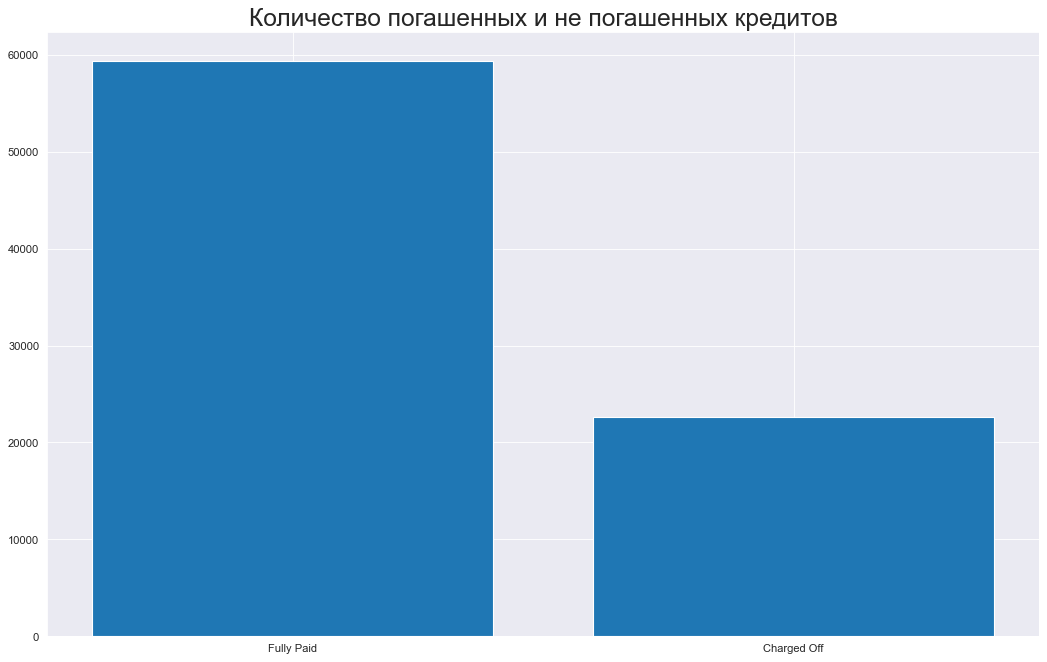

In [109]:
cols = data_scoring["Loan Status"].unique()
counts = data_scoring["Loan Status"].value_counts()

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(cols, counts)

plt.title("Количество погашенных и не погашенных кредитов", fontsize=22)
plt.show()

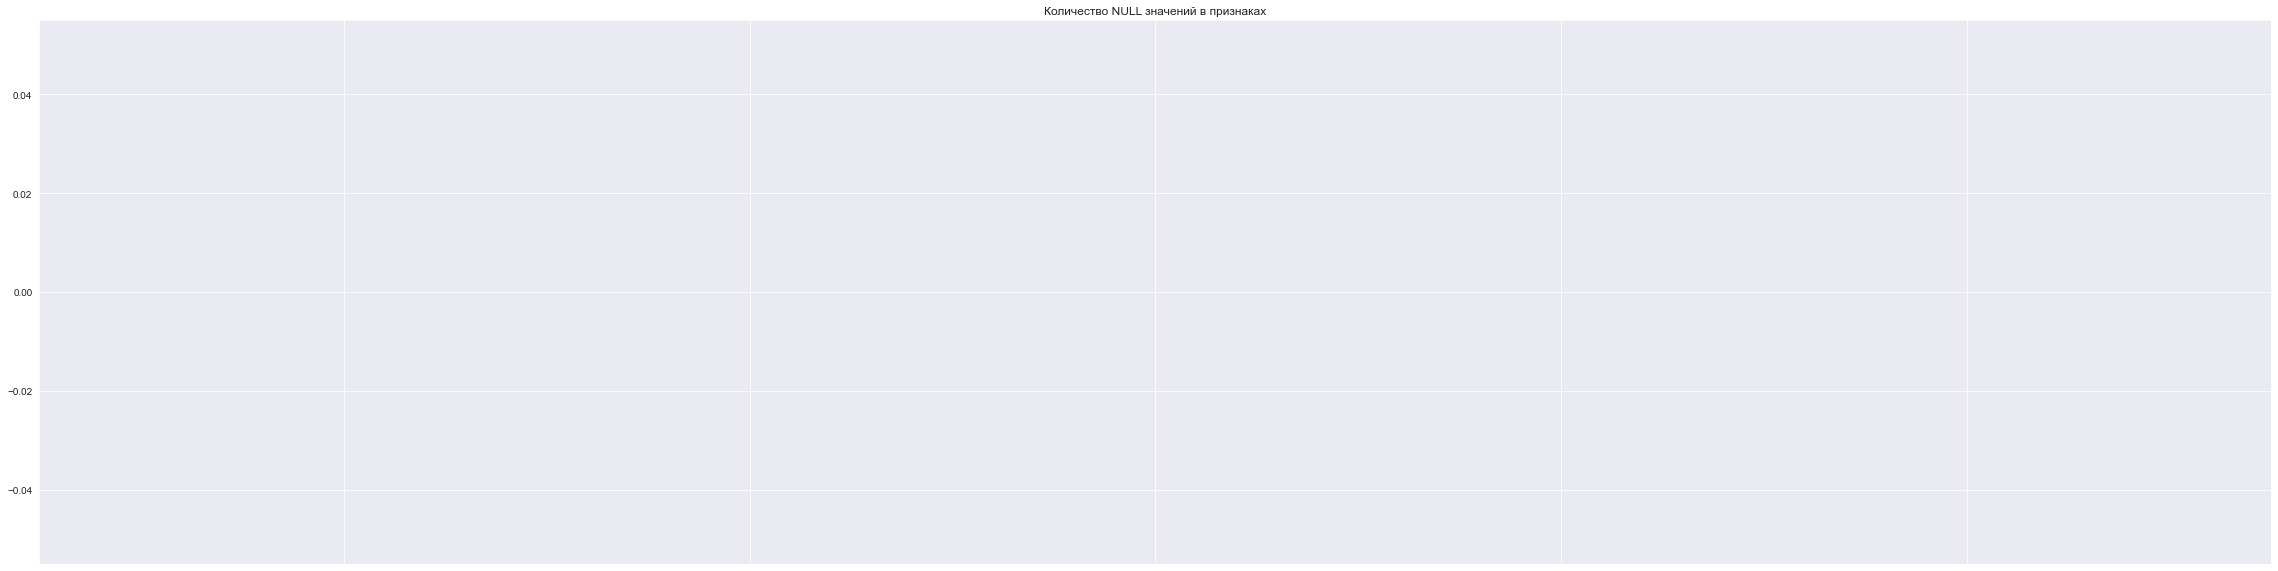

In [110]:
columns_with_null = data_scoring.isna().sum() > 0
columns_with_null = columns_with_null.index[columns_with_null].to_list()

plt.figure(figsize=(40, 10))

groups = columns_with_null
len_of_nulls = data_scoring[columns_with_null].isna().sum()
colors = [["r", "b", "g"][int(np.random.randint(0, 3, 1))] for _ in len_of_nulls]

plt.gca().set_xticklabels(columns_with_null, rotation=40, horizontalalignment= 'right')
plt.bar(groups, len_of_nulls, color=colors)
plt.title("Количество NULL значений в признаках")
plt.show()

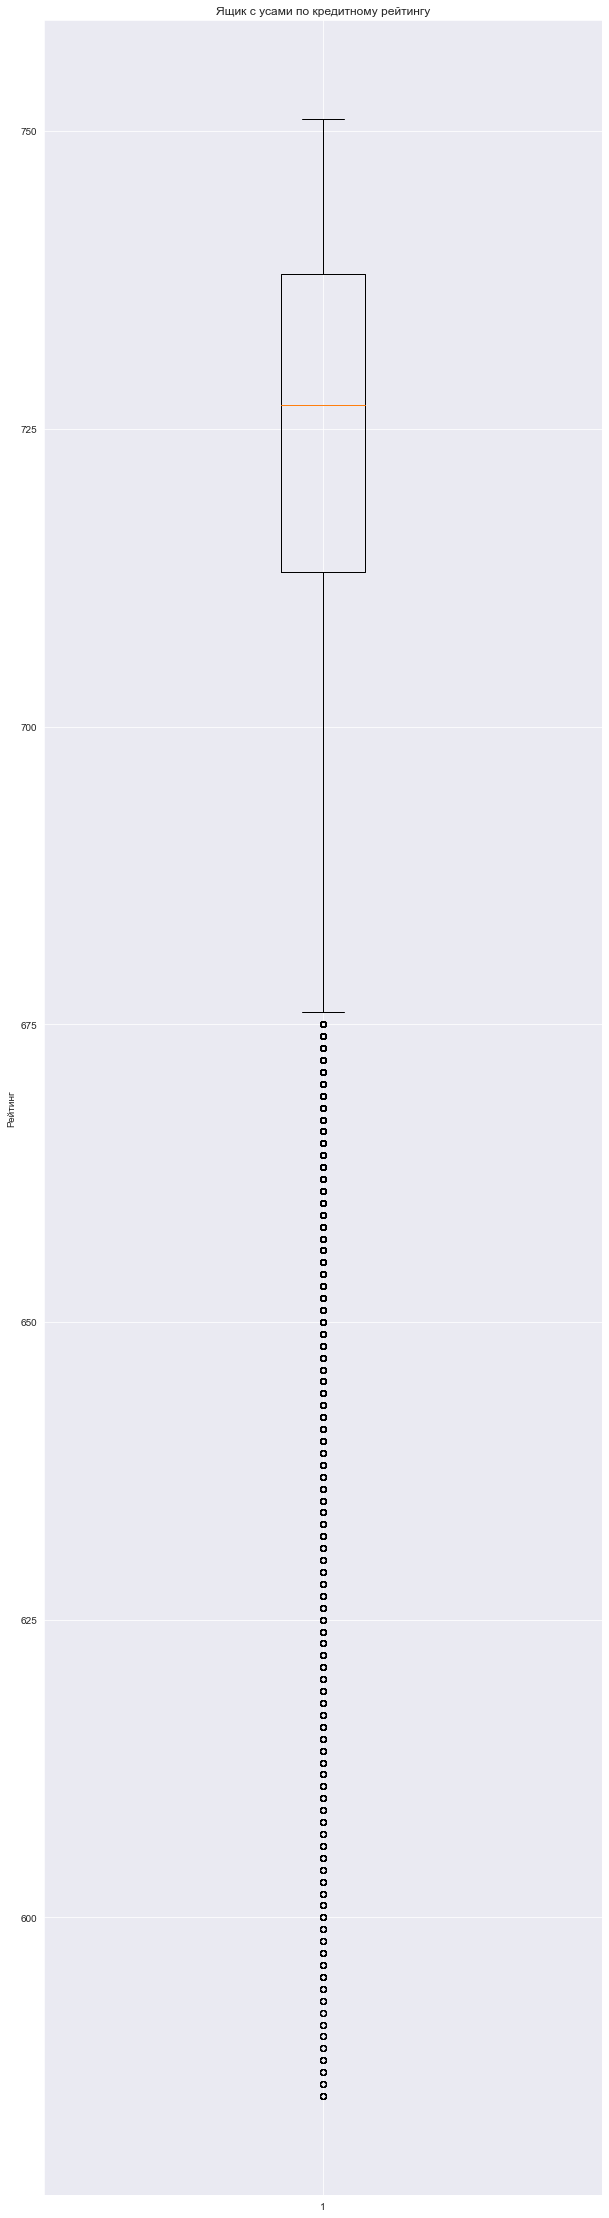

In [111]:
credit_score = data_scoring["Credit Score"]

plt.figure(figsize=(10, 40))

plt.boxplot(credit_score)
plt.title('Ящик с усами по кредитному рейтингу')
plt.ylabel('Рейтинг')
plt.show()

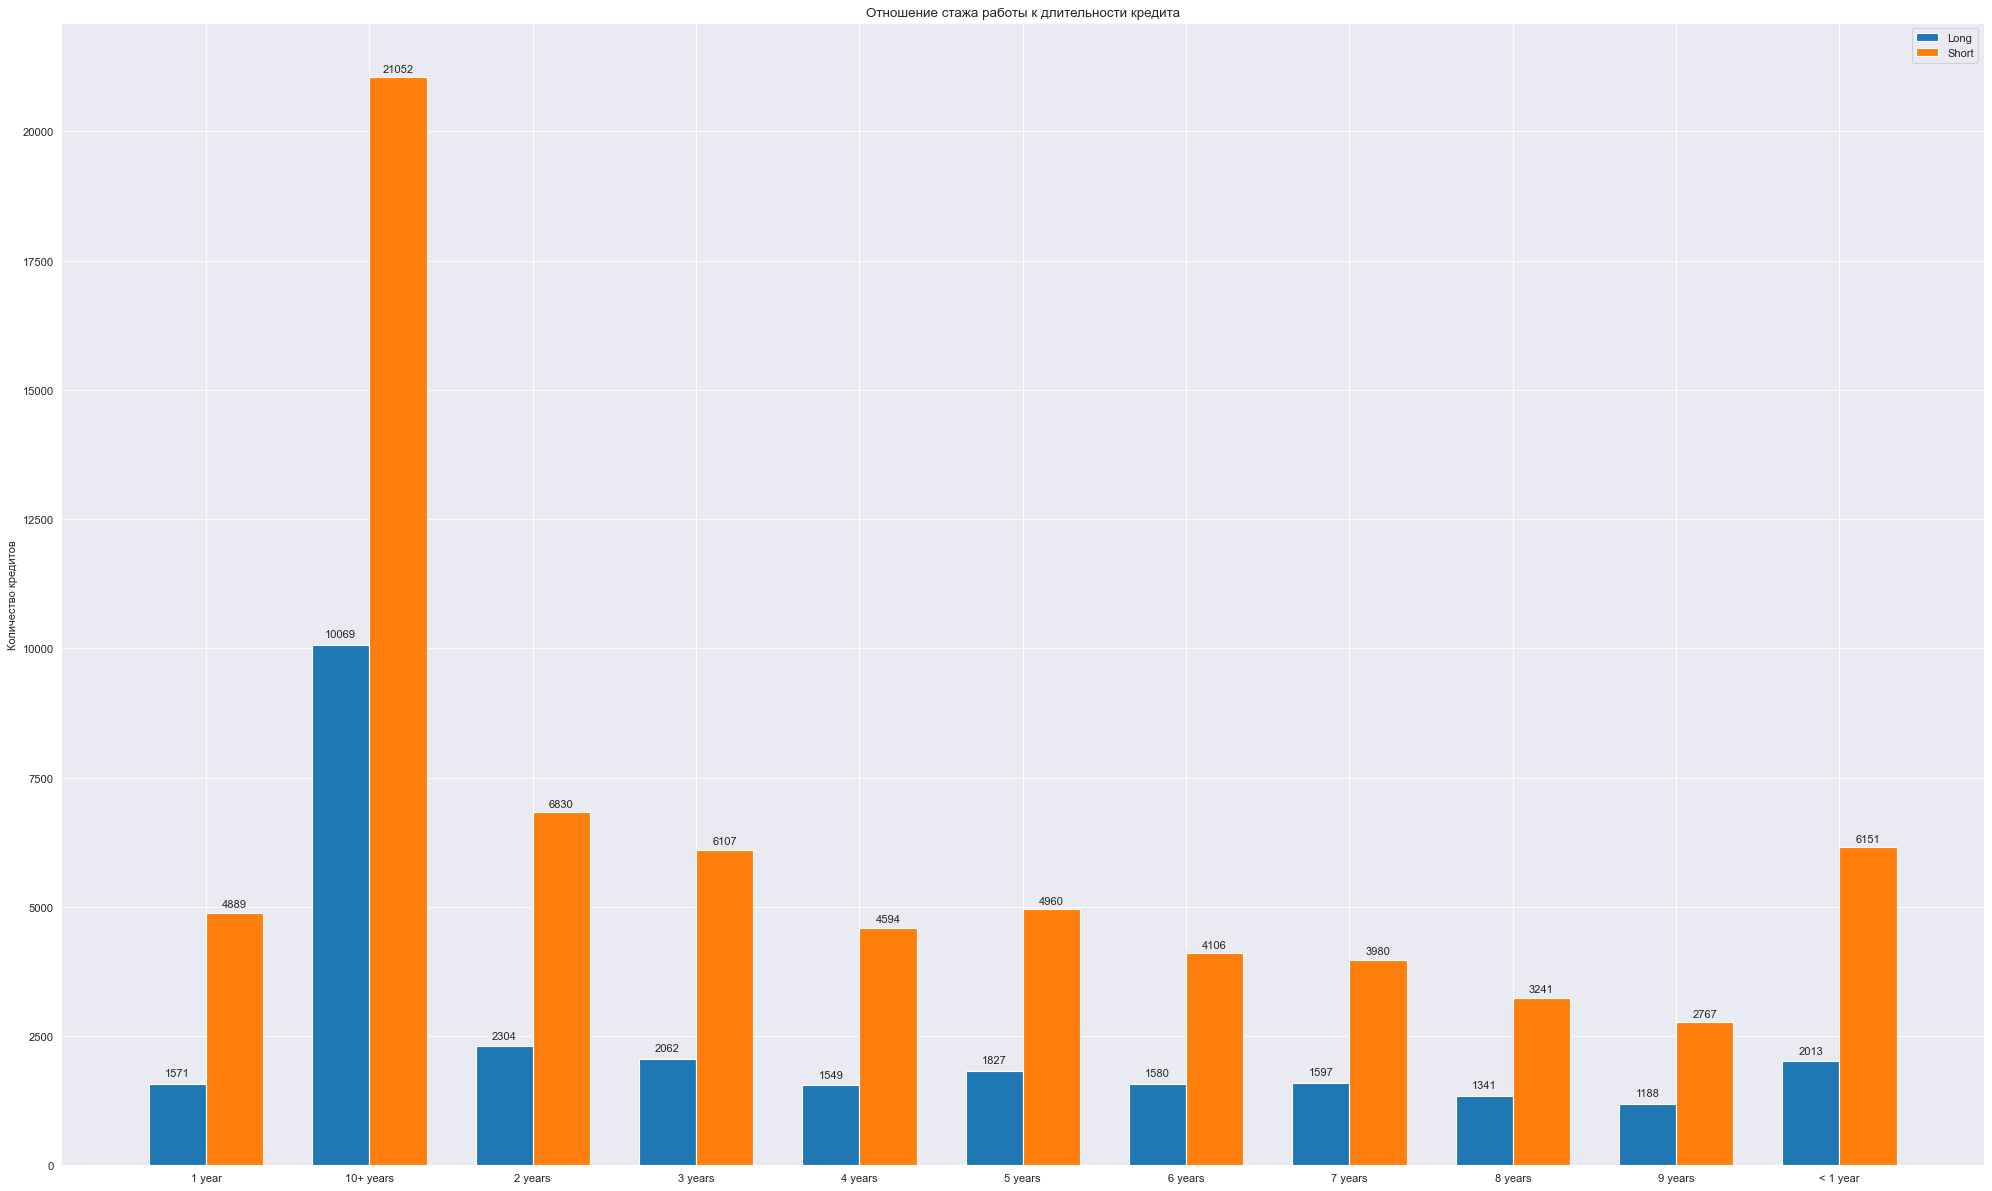

In [112]:
labels = years_term.index
x = np.arange(len(labels))
width = 0.35


fig = plt.figure(figsize=(25,15), dpi=80)
ax = fig.add_subplot()

rects1 = ax.bar(x - width/2, years_term["Long Term"], label="Long", width = 0.35)
rects2 = ax.bar(x + width/2, years_term["Short Term"], label="Short", width = 0.35)

ax.set_title('Отношение стажа работы к длительности кредита')
ax.set_ylabel('Количество кредитов')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

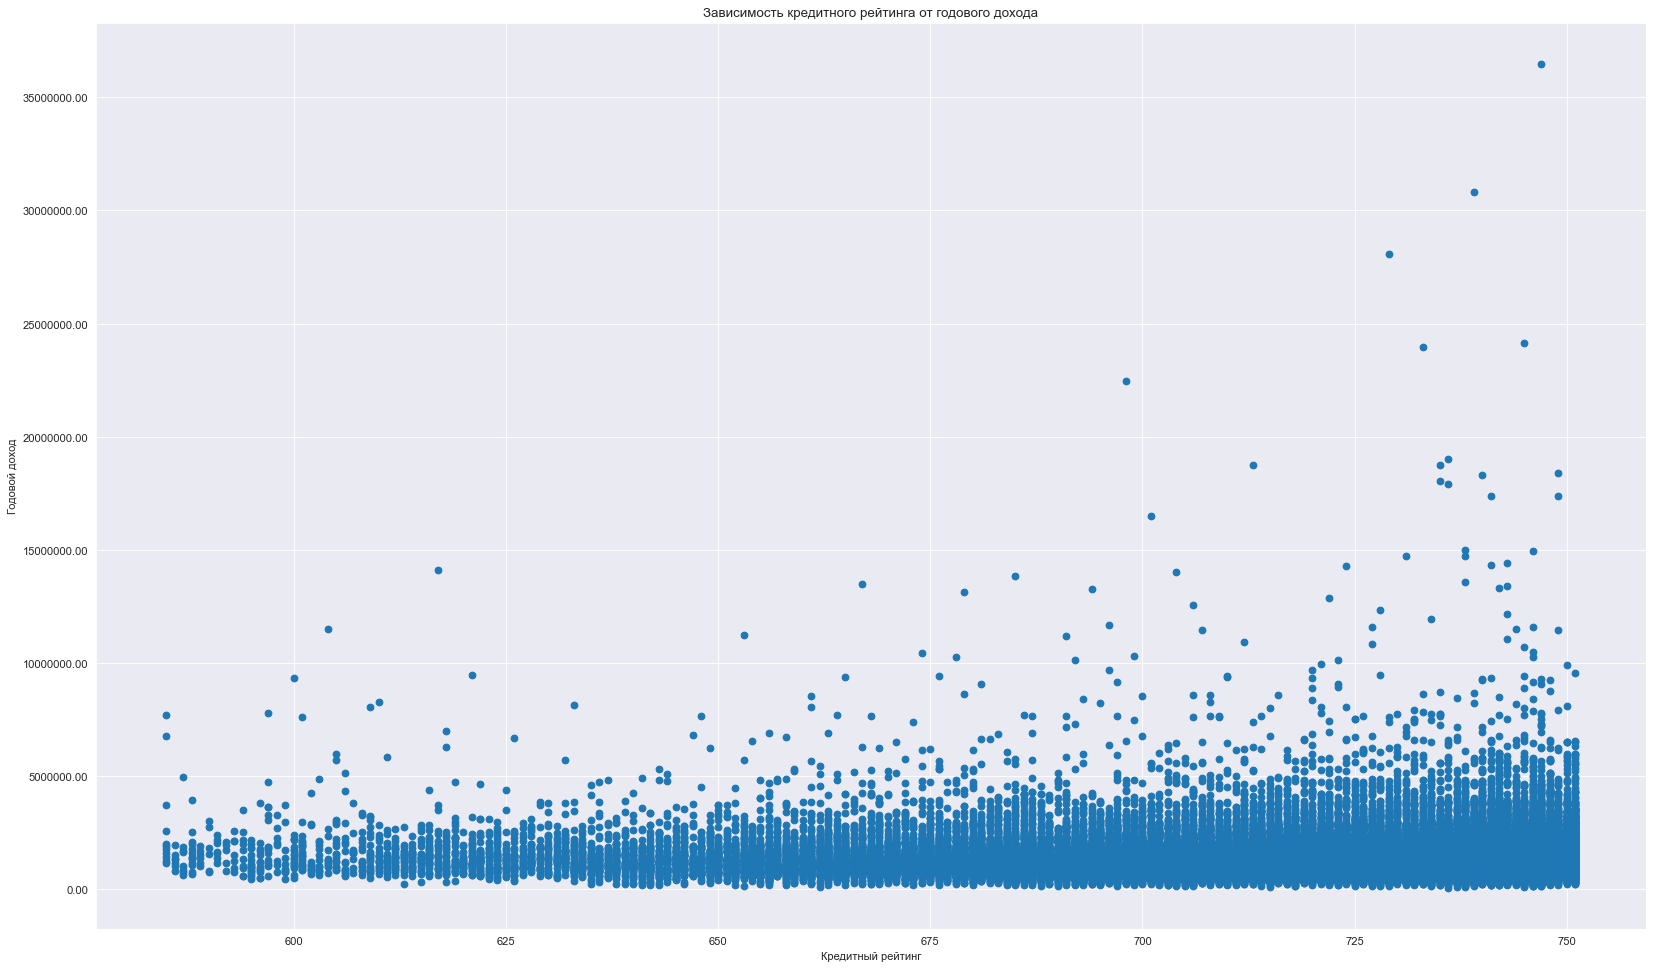

In [113]:
score_and_annual_inc = data_scoring[["Credit Score", "Annual Income"]].dropna().sort_values(by=["Credit Score"])
score_and_annual_inc = score_and_annual_inc[score_and_annual_inc["Credit Score"] <= 800]

fig = plt.figure(figsize=(25,15), dpi=80)
ax = fig.add_subplot()
ax.scatter(score_and_annual_inc["Credit Score"], score_and_annual_inc["Annual Income"])
ax.set_title("Зависимость кредитного рейтинга от годового дохода")
ax.set_ylabel("Годовой доход")
ax.set_xlabel("Кредитный рейтинг")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

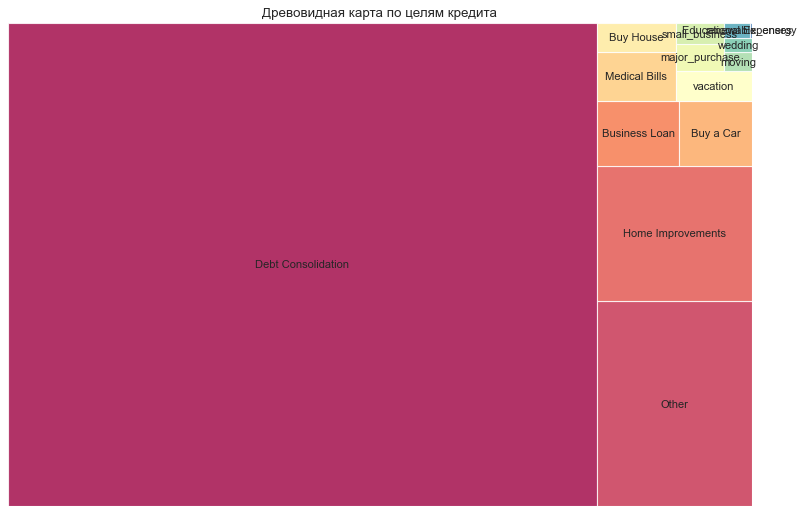

In [114]:
purpose = data_scoring["Purpose"].value_counts()
labels = purpose.index
sizes = purpose.values
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi=80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, text_kwargs={'fontsize':10})

plt.title('Древовидная карта по целям кредита')
plt.axis('off')
plt.show()

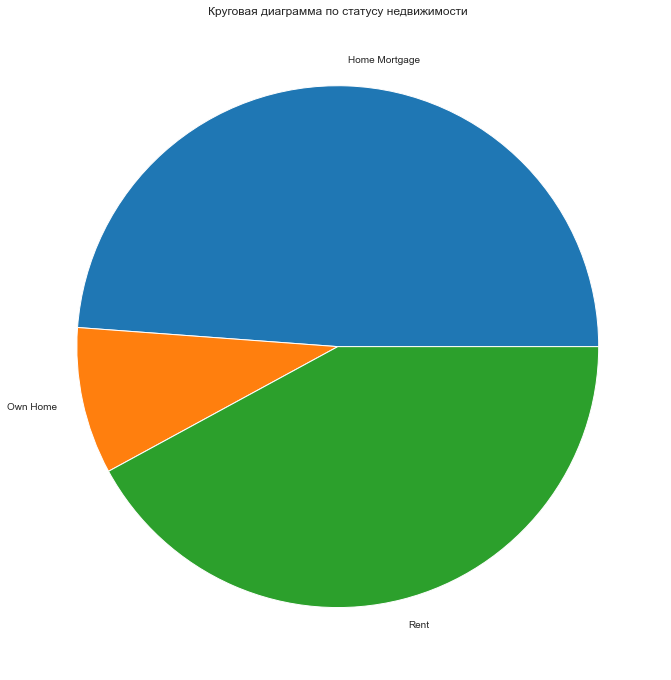

In [115]:
df = data_scoring.groupby('Home Ownership').size()

df.plot(kind='pie', subplots=True, figsize=(12, 12))
plt.title("Круговая диаграмма по статусу недвижимости")
plt.ylabel("")
plt.show()

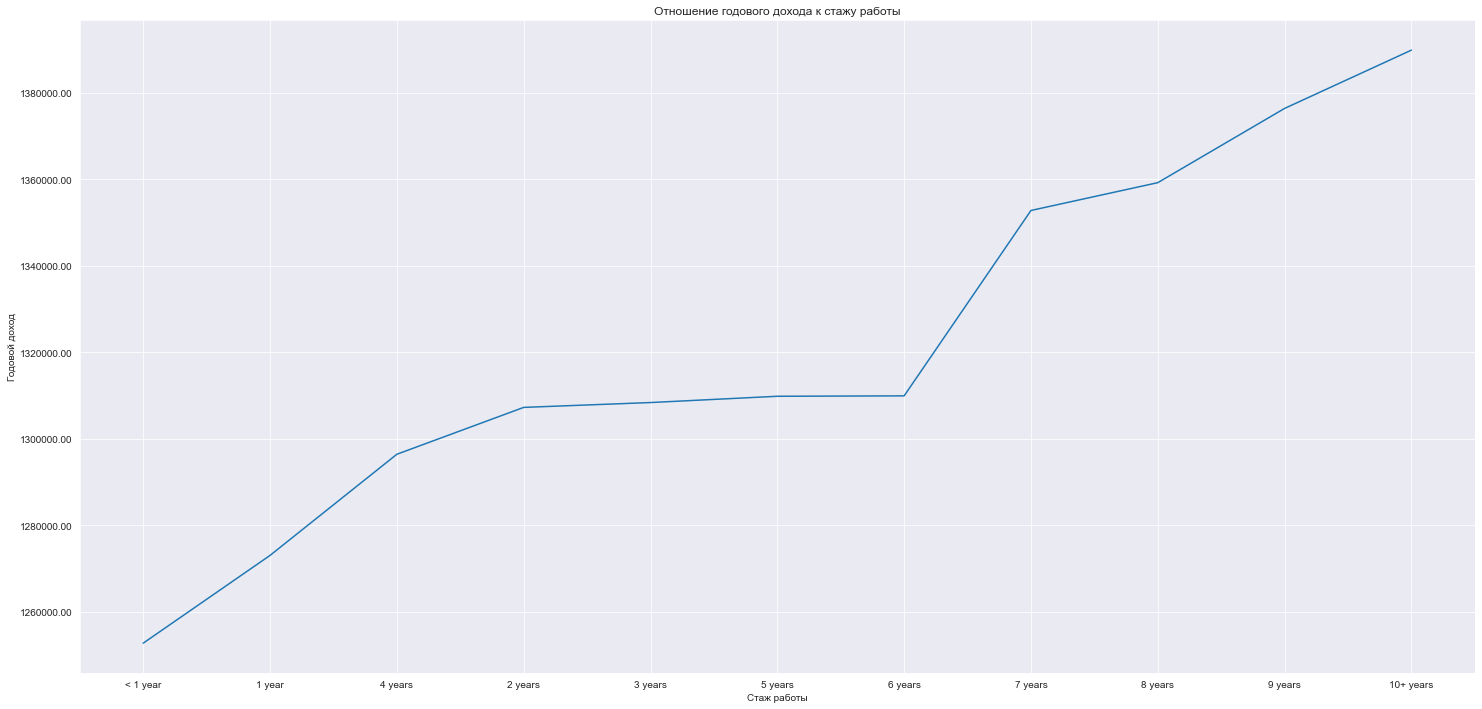

In [116]:
years_income = data_scoring[["Annual Income", "Years in current job"]].dropna().groupby("Years in current job").mean().sort_values(by=["Annual Income"])

fig = plt.figure(figsize=(25, 12))
ax = fig.add_subplot()

ax.plot(years_income.index, years_income["Annual Income"])

ax.set_title("Отношение годового дохода к стажу работы")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylabel("Годовой доход")
ax.set_xlabel("Стаж работы")

plt.show()

## Преобразовываем атрибуты исходного датасета в числовые признаки

In [117]:
pd.get_dummies(data_scoring['Years in current job'], prefix="Years in current job")

,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year
0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99994,1,0,0,0,0,0,0,0,0,0,0
99996,1,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,1,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,1,0


In [118]:
pd.get_dummies(data_scoring['Term'], prefix="Term")

,Term_Long Term,Term_Short Term
0,0,1
1,0,1
2,0,1
3,1,0
5,0,1
...,...,...
99994,0,1
99996,0,1
99997,0,1
99998,0,1


In [119]:
pd.get_dummies(data_scoring['Home Ownership'], prefix="Home Ownership")

,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
5,1,0,0
...,...,...,...
99994,1,0,0
99996,0,0,1
99997,0,0,1
99998,0,0,1


In [120]:
pd.get_dummies(data_scoring['Purpose'], prefix="Purpose")

,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,0,0,0,0,0,0,1,0,0,0,0,0,0
99996,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [121]:
data_scoring = pd.concat([data_scoring,
                          pd.get_dummies(data_scoring['Years in current job'], prefix="Years in current job"),
                          pd.get_dummies(data_scoring['Term'], prefix="Term"),
                          pd.get_dummies(data_scoring['Home Ownership'], prefix="Home Ownership"),
                          pd.get_dummies(data_scoring['Purpose'], prefix="Purpose")], axis=1)
data_scoring.drop(columns=['Years in current job', 'Term', 'Home Ownership', 'Purpose'], inplace=True)
data_scoring.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,Fully Paid,445412,709.00,1167493.00,5214.74,17.20,32.00,6,1,228190,...,0,1,0,0,0,0,0,0,0,0
1,Fully Paid,262328,727.00,1170590.00,33295.98,21.10,8.00,35,0,229976,...,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999,741.00,2231892.00,29200.53,14.90,29.00,18,1,297996,...,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666,721.00,806949.00,8741.90,12.00,32.00,9,0,256329,...,0,0,0,0,0,0,0,0,0,0
5,Charged Off,206602,729.00,896857.00,16367.74,17.30,32.00,6,0,215308,...,0,0,0,0,0,0,0,0,0,0


In [122]:
data_scoring.shape

(81998, 43)

In [123]:
data_scoring['Loan Status'] = data_scoring['Loan Status'].factorize()[0]
data_scoring.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,445412,709.00,1167493.00,5214.74,17.20,32.00,6,1,228190,...,0,1,0,0,0,0,0,0,0,0
1,0,262328,727.00,1170590.00,33295.98,21.10,8.00,35,0,229976,...,0,0,0,0,0,0,0,0,0,0
2,0,99999999,741.00,2231892.00,29200.53,14.90,29.00,18,1,297996,...,0,0,0,0,0,0,0,0,0,0
3,0,347666,721.00,806949.00,8741.90,12.00,32.00,9,0,256329,...,0,0,0,0,0,0,0,0,0,0
5,1,206602,729.00,896857.00,16367.74,17.30,32.00,6,0,215308,...,0,0,0,0,0,0,0,0,0,0


# Начинаем машинное обучение

Нам требуется предсказать выплатит ли человек кредит, основываясь на предоставленных о нем данных

Наша целевая переменная - столбец Loan Status, означающий выплатил ли человек кредит
Наши признаки - все остальное

In [124]:
X = data_scoring.drop(['Loan Status'], axis=1)
y = data_scoring['Loan Status']

In [125]:
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412,709.00,1167493.00,5214.74,17.20,32.00,6,1,228190,416746.00,...,0,1,0,0,0,0,0,0,0,0
1,262328,727.00,1170590.00,33295.98,21.10,8.00,35,0,229976,850784.00,...,0,0,0,0,0,0,0,0,0,0
2,99999999,741.00,2231892.00,29200.53,14.90,29.00,18,1,297996,750090.00,...,0,0,0,0,0,0,0,0,0,0
3,347666,721.00,806949.00,8741.90,12.00,32.00,9,0,256329,386958.00,...,0,0,0,0,0,0,0,0,0,0
5,206602,729.00,896857.00,16367.74,17.30,32.00,6,0,215308,272448.00,...,0,0,0,0,0,0,0,0,0,0


In [126]:
y.head()

0    0
1    0
2    0
3    0
5    1
Name: Loan Status, dtype: int64

Будем использовать MLPClassifier, Linear Regression, Random Forest Classifier

In [127]:
result = pd.DataFrame({'model' : ['MLPClassifier', 'Linear Regression', 'Random Forest Classifier', ],
                       'train_score': 0, 'test_score': 0})
result

,model,train_score,test_score
0,MLPClassifier,0,0
1,Linear Regression,0,0
2,Random Forest Classifier,0,0


Разделяем на тестовую и обучающую выборку

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=43)

In [129]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
print("Метрика точности: ", metrics.precision_score(y_test, y_pred, average="macro"))
print("Метрика полноты: ", metrics.recall_score(y_test, y_pred, average="macro"), end="\n\n\n")

Метрика достоверности предсказания:  0.7254268292682927
Метрика точности:  0.4878294289897511
Метрика полноты:  0.499970191958743




In [130]:
# from sklearn import metrics
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
#
#
# C = 1.0
# clf = SVC(kernel="poly", C=C)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
# print("Метрика точности: ", metrics.precision_score(y_test, y_pred, average="macro"))
# print("Метрика полноты: ", metrics.recall_score(y_test, y_pred, average="macro"), end="\n\n\n")

In [131]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
#
# C = 1.0
# models = (
#     LogisticRegression(),
#     # SVC(kernel="rbf", C=C),
#     # SVC(kernel="poly", C=C),
#     # KNeighborsClassifier(),
#     MLPClassifier(),
#     RandomForestClassifier(),
#     # GaussianNB()
# )
#
# models = [clf.fit(X_train, y_train) for clf in models]
# titles = [
#     "логистическая регрессия (LogisticRegression)",
#     # "метод опорных векторов с гауссовым ядром (SVC)",
#     # "метод опорных векторов с полиномиальным ядром (SVC)",
#     # "метод k ближайших соседей (KNeighborsClassifier)",
#     "многослойный перцептрон (MLP)",
#     "RandomForestClassifier",
#     # "GaussianNB"
# ]

In [132]:
# for clf, title in zip(models, titles):
#     y_pred = clf.predict(X_test)
#
#     print(title)
#     print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
#     print("Метрика точности: ", metrics.precision_score(y_test, y_pred, average="macro"))
#     print("Метрика полноты: ", metrics.recall_score(y_test, y_pred, average="macro"), end="\n\n\n")

In [133]:
# clf = pd.read_csv("data/credit.csv")
# clf.head()

In [134]:
# C = [0.1, 1, 10]

In [135]:
# for i in C:
#     clf = SVC(kernel="rbf", C=C)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
#     print("Метрика точности: ", metrics.precision_score(y_test, y_pred))
#     print("Метрика полноты: ", metrics.recall_score(y_test, y_pred))

In [136]:
C = [0.1, 1, 10]
maxim_iter = [100, 200, 300]
var_solver = ["sgd", "adam", "lbfgs"]

In [137]:
for s in var_solver:
    for m in maxim_iter:
        clf = MLPClassifier(solver=s, max_iter=m)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("Solver: ", s, "\nmax_iter: ", m, end="\n")
        print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
        print("Метрика точности: ", metrics.precision_score(y_test, y_pred))
        print("Метрика полноты: ", metrics.recall_score(y_test, y_pred))


NameError: name 'MLPClassifier' is not defined

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear'), 'C':[0.1, 1, 10]}
# mlp_class = LogisticRegression()
# clf = GridSearchCV(mlp_class, parameters)
# clf.fit(X_train, y_train)

In [ ]:
# clf.best_params_

In [ ]:
# clf.score(X_train, y_train)

In [138]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [143]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[11895,     6],
       [ 4497,     2]], dtype=int64)

<AxesSubplot:>

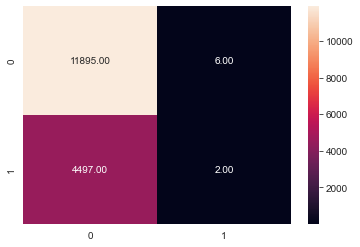

In [159]:
# import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='.2f')

In [164]:
1- metrics.precision_score(y_test, y_pred, pos_label=1)

0.75

In [ ]:
# data_scoring.drop(columns=["Loan ID", "Customer ID"]).replace({"Fully Paid": 1, "Charged Off": 0}).corr()

In [ ]:
# clf